> Created on Thu Nov  3 18:53:30 2022  @author: Richie Bao-caDesign设计(cadesign.cn)

## 2.7.1 城市环境传感器AoT（SAGE）数据预处理

[AoT（Array of Things）](https://arrayofthings.github.io/)<sup>①</sup>物联网阵列（无线智能传感器网络）是一个实验性的城市测量系统，实现定量的社会科学和城市监测，包括可编程、带有传感器和计算能力的模块化“节点”，实现节点内数据分析，例如计算一个十字路口的车辆数量，然后删除图像数据而不是将其发送到数据中心。AoT节点被安装在芝加哥和越来越多的合作城市，以收集城市环境、基础设施和活动的实时数据，提供来自城市测量的开放数据，供研究和公共使用，支持环境动力学、城市建筑、工程和社会科学等不同的研究领域，而且还可以为社区团体和城市规划者提供信息。AoT的概念类似于城市的 "健身追踪器（fitness tracker）"，测量影响城市环境宜居的因素，如气候、空气质量和噪音等<sup>[1]</sup>。

最初的AoT节点使用超过其计划寿命2年，服役4年后于2021年退役，但是在AoT使用的[Waggle平台](https://github.com/waggle-sensor)<sup>②</sup>的基础上开发新一代设备，这些设备中的第一个在2021年安装，更多的设备计划在2022年及以后安装，这个国家规模的计划，通过国家科学基金会（National Science Foundation，NSF-funded，美）资助的中等规模研究基础设施计划资助，被称为“SAGE”。SAGE团队拥有一个更加多样化的科学家群体，包括那些对测量自然环境和自然破坏者感兴趣的科学家。SAGE平台的设想吸收了从AoT项目、NSF的国家生态观测站网络（National Ecological Observatory Network ，NEON）、UCSD的WiFire（野火监测）项目和其他项目中获得的经验，以创建新一代阿贡国家实验室（Argonne National Laboratory）的Waggle硬件和软件基础设施。SAGE由西北-阿贡科学与工程研究所（Northwestern-Argonne Institute for Science and Engineering，NAISE）领导。与芝加哥大学（University of Chicago）、阿贡国家实验室、科罗拉多大学（the University of Colorado）、加利福尼亚大学-圣地亚哥分校（the University of California-San Diego）、北伊利诺伊大学（Northern Illinois University）、犹他大学（University of Utah）和乔治梅森大学（George Mason University）合作。

### 2.7.1.1 城市环境传感器 AoT（Array of Things）

从[Waggle Datasets](https://github.com/waggle-sensor/waggle/blob/master/data/README.md)<sup>③</sup>处下载AoT监测数据，更新时间为2022年8月30日，该数据的压缩包大小为33.7GB。

#### 1）环境传感器说明


下载的AoT数据包括:

1. `data(data.csv.gz)`: 按时间戳升序排列的传感器测量数据;
2. `nodes.csv`: 节点元数据。主要包括节点的ID，经纬度，时间戳，信息描述等信息；
3. `sensors.csv`： 传感器元数据。 包括传感器测量内容，浓度单位，最小最大值，以及传感器说明文件；
4. `provenance.csv`：项目版本，起止时间和数据下地址等；
5. `README.md`：说明文件。对各文件的解释及数据参数的说明；
6. `offsets.csv`： data.csv.gz数据文件的字节偏移量。

根据`sensors.csv`文件，分类测量内容为气体类、颗粒物、热环境、噪音、光、电磁场和惯性测量等内容。

| 序号  | 分类  | 测量内容  | 单位  | 说明<sup>[2]</sup>  |
|---|---|---|---|---|
| 1  | 气体类  | CO（一氧化碳，carbon monoxide）  | ppm   | CO是一种无色、无味的气体。当大量吸入时，对人体造成伤害。某物燃烧时会释放CO，在户外，空气中的CO主要来源于燃烧化石燃料的各类汽车和机械；在户内未通风条件下，有泄露的煤油、燃气、烟筒、火炉等，影响室内空气质量。 <br>吸入高浓度CO，会减少血液中输送到心脏和大脑等关键器官的氧气量。在室内封闭环境下，会导致头晕、神志不清、昏迷和死亡；在户外，非常高浓度的CO不太可能发生，但是当达到一定水平，会对某些类型的心脏病患者造成特别影响。在健身或压力增大等心脏需要更多氧气条件下，导致进入心脏的氧气减少，并伴有胸痛（胸绞痛）。 |
| 2 |   |  H2S（硫化氢，Hydrogen Sulfide） | ppm  |  H2S是一种剧毒有害气体，透明、散发出臭鸡蛋的气味。这种气体具有高度的爆炸性，长时间暴漏在这种气体中可能会致命。H2S长存在于制造工厂、炼油厂和气体处理设施中。 |
| 3|   | NO<sub>2</sub>(二氧化氮, Nitrogen Dioxide)  | ppm  | NO<sub>2</sub>是一种气态的空气污染物，由氮和氧组成（氮氧化物）。当煤、石油、天然气或柴油等化石燃料在高温下燃烧时产生。 汽车是最大的排放源，其次是放电厂、柴油驱动的重型建筑设备和其它可移动发动机及工业锅炉。室外空气中的二氧化氮和其他氮氧化物会造成颗粒污染和产生臭氧的化学反应。 NO<sub>2</sub>会对肺部造成一系列有害影响，包括：气道炎症、咳嗽、气喘、降低肺功能、增加哮喘发作，对肺癌患者造成更大风险。同时，NO<sub>2</sub>与心血管疾病、新生儿出生体重过轻及过早死亡风险增加有关。<br>室内的煤油或燃气加热器和煤气炉灶也会大量产生NO<sub>2</sub>，如果没有完全排放到室外，室内浓度会升高。|
| 4  |   | O<sub>3</sub> (臭氧, trioxygen)  | ppm  |  O<sub>3</sub>由3个氧原子结合在一起，有一种特殊的刺鼻气味。因为自身不稳定在低层大气中分解为 O<sub>2</sub>。O<sub>3</sub>是由O<sub>2</sub>在地球大气中的紫外线（UV, ultraviolet）和放电作用下形成。它的浓度很低，在平流层的臭氧层（ozone layer）中浓度最高。臭氧层通过过滤大部分紫外线辐射保护地球生物。地面上的O<sub>3</sub>，通常是太阳光和汽车、工业等来源排放物相互作用产生，对人类的健康有害。例如， 对眼鼻喉和下呼吸道刺激和炎症（咳嗽、喉咙痛或胸部不舒服）；肺功能下降（不能像平常一样深呼吸或大力呼吸）；引起哮喘和慢性呼吸系统疾病；呼吸道感染的易感性增加。|
| 5  |   | oxidizing_gases（氧化气体）  | ppm  |  oxidizing_gases包括任何含氧高于大气浓度（23-25%）的气体，如氧化氮（nitrogen oxides）、卤素气体（halogen gases，如如氯（chlorine）和氟（fluorine）。）这些气体能与可燃物质发生迅速而聚类的反应。可燃物质包括含碳的有机物质，例如大多数可燃气体，可燃液体、油、润滑脂（greases），很多塑料和植物；金属粉末；及其它可氧化物质，例如肼（hydrazine）、氢（hydrogen）、 氢化物（hydrides）、硫（sulphur）或硫化合物，硅（silicon）和氨（ammonia）或氨化合物。 |
| 6  |  |   reducing_gases（还原性气体） | ppm  | 指化学反应中经常作为还原剂使用的气体。例如氢气（hydrogen）、一氧化碳(carbon monoxide)等。|
| 7  |   |  SO<sub>2</sub>(二氧化硫, Sulfur Dioxide) |  ppm | SO<sub>2</sub> 可被用作更大种类气态硫氧化物SO<sub>x</sub>（gaseous sulfur oxides）的指示物（ indicator）。 大气中发现其它气态硫，例如SO<sub>3</sub>的浓度应小于SO<sub>2</sub>。减少SO<sub>2</sub>的控制措施通常可以预期减少人们暴漏到所有SO<sub>x</sub>中的机会。对减少颗粒状硫污染物（例如细硫酸盐颗粒，fine sulfate particles）的形成同样重要。<br>SO<sub>2</sub>最主要来源于发电厂和其它工业设施的化石燃料燃烧；较小来源于从矿石中提取金属等工业过程，火山等自然资源，机车、轮船和其它车辆，及重型设备，其燃烧的燃料含硫量较高。<br>短期接触SO<sub>2</sub>会损害人体呼吸系统，是呼吸困难。哮喘患者、尤其儿童对SO<sub>2</sub>的这些影响尤其敏感。导致空气中SO<sub>2</sub>高浓度形成的排放也会导致其它氧化物（SO<sub>x</sub>）的形成。与大气中的其它化合物发生反应，形成小颗粒。这些颗粒导致了微粒物质污染（ particulate matter，PM）。小颗粒可以渗入人的肺部，如果达到一定量则会导致健康问题。自然中，高浓度的气态硫会破坏植被的树叶，降低其生长速度。|
| 8  | 颗粒物，微粒(particulate matter,PM)  | pm<sub>1</sub>,pm<sub>2.5</sub>, pm<sub>5</sub>,pm<sub>10</sub> | μg/m<sup>3</sup>  |  PM代表颗粒物质（也称之为颗粒污染，particle pollution），是空气中存在的固体颗粒和液滴的混合物。有些颗粒，例如灰尘粉末、煤烟等大到肉眼可见；另一些则很小，只能用电子显微镜观察。<br>颗粒污染包括：PM<sub>10</sub>可吸入颗粒物，直径一般在10微米（micrometers）及一下；PM<sub>2.5</sub>可吸入的细小微粒，直径一般在2.5微米一下。这些颗粒有许多大小和形状，可由数百种不同的化学物质组成。<br>颗粒污染有些是直接从源头排放，例如建筑工地、未铺设的道路、田地、烟囱或火灾等。大气中的大多数颗粒由二氧化硫和氧化物等化学物质的复杂反应形成，通常是发电厂、工业和汽车排放的污染物。<br>颗粒物包含微小的固体或液滴，因为非常小，足可以被吸入并导致严重的健康问题。一些小于10微米的颗粒可以进入人的肺部，一些甚至可能进入到人的血液中。直径小于2.5微米的颗粒，也称为细颗粒（ fine particles，或者PM<sub>2.5</sub>），对健康构成最大的风险。PM<sub>2.5</sub>也是雾霾的主要起因。 |
| 9  | 热环境  | 温度（temperature）   |  C | 在强调温度的时空分布时，通常使用热状态（thermal regime）一词。温度在塑造水生态系统的结构和功能时起到基本作用。例如在物理（Physical）层面上， 影响水密度（Water density）、热分层（thermal stratification），氧和其它化学物质的溶解度（solubility ）；在化学（Chemical）层面上，影响养分循环速率、污染物转换速率；在生物（Biological）层面上，影响生物的生存、生长、繁殖、发展、行为、生境偏好和竞争。温度同样影响人们活动的热舒适度，以及某些事物发生的起因，例如在加热的排放物附近聚集的鱼群，不透水表面影响等。|
| 10  |   |  湿度（humidity） | 相对湿度（Relative Humidity, RH）  | RH是空气中湿度的量度，与潜在的饱和水平相比较（potential saturation level）。温暖的空气可以容纳更多的水分，当接近100%的湿度时，空气中的水分会凝结（露点）。RH是热舒适性的决定条件之一。  |
| 11  |   | 大气压（pressure）  |  hPa（Hectopascal Pressure Unit） |  百帕斯卡是帕斯卡的100倍，帕斯卡是国际单位制的压力单位。百帕斯卡是测量大气压力或气压的国际单位。1百帕斯卡等于100帕斯卡。 |
| 12  | 噪音  | octave_n_intensity  | dB（分贝）  | 声压级计算（Sound Pressure Level Calculation），每65秒报告一次周围的噪音水平（1分钟间隔，5秒采样）。从麦克风采样音频5秒，以dBm（毫瓦分贝）计算噪音水平。声压级的估计是基于傅里叶变换。通过傅里叶变换将麦克风采集到的数据转换成频率强度域。在频率强度域中，选取22hz ~ 22khz的频率计算给定倍频带（Octave_band用于控制倍频，默认为1/1倍频。octave_n_intensity，默认10个。）下的平均dBm。 <br> 噪音通常来源于交通工具、工厂机器设备、建筑施工和人们的社会和家庭活动等。噪音对人类的危害主要表现在听力的损伤、睡眠干扰、人体的生理和心理影响。当在100分贝左右噪音环境下工作会感到刺耳、难受、甚至引起暂时性耳聋。超过140分贝的噪音会引起眼球振动，视觉模糊，呼吸、脉搏和血压都会发生波动。甚至会使用、全身血管收缩，供血减少，说话能力了受到影响。|
| 13  | 光  | 光强度（light intensity）/可见光强度（visible light intensity）  | 照度：uW/cm<sup>2</sup>（辐照度（irradiance）单位，落在单位表面上的能量）； lux（光度单位，落在单位表面上的可见光）。  |  人工照明在为人类带来好处的同时，对环境也带来了负面的影响。例如光污染用来描述过度的夜间人工照明，尤其是在大型的城市聚集区。这对自然适应夜间生活的动植物和人类健康产生负面影响。同时，城市区域的高层建筑高度和密度也对城市室外和室内的太阳光照时长带来直接的影响。 |
| 14  |   | 红外光谱强度（ir_intensity）  | uW/cm<sup>2</sup>  |  / |
| 15 |   | 紫外线强度（uv_intensity）  | uW/cm<sup>2</sup>  | 臭氧层的损耗减少了大气吸收紫外线避免生物受到伤害的能力。过度暴露于紫外线下影响人类的健康，这包括皮肤癌等各类皮肤疾病，又如光化性角化病、 皮肤过早老化等；同时会增加某些白内障的可能性及眼睛损伤；也会抑制人体免疫系统的正常功能等。|
| 16  | 电磁场（EMFs ，Electric and magnetic fields）  | magnetic_field_x/y/z  | mG  | 除地球磁场外，电磁场由各类电子设备产生，是人类日常生活的一部分。目前没有证据证明其于任何疾病有关。  |
| 17  | 惯性测量装置（inertial measurement unit，IMU）  | 加速度（acceleration_x/y/z）  | mg  | /  |



为方便常用参数、文件路径管理，建立配置文件`cfg_AoT.yml`，并书写读取`yaml`格式配置文件的函数`cfg_load_yaml()`。

`cfg_AoT.yml`

```
---
epsg_wgs84: 4326
Chicago_epsg: 32616

postgreSQL:
    myusername: 'postgres'
    mypassword: '123456'
    mydatabase: 'AoT_20220831'
    geom_col: 'geometry' 

AoT:
    AoT_path: 'D:\AoT\AoT_slice'
    AoT_nodes_fp: './data/AoT_Chicago.complete.2022-08-31/nodes.csv'    
    AoT_sensors_fp: './data/AoT_Chicago.complete.2022-08-31/sensors.csv'
    AoT_offsets_fp: './data/AoT_Chicago.complete.2022-08-31/offsets.csv'
    AoT_data_gz_fp: 'D:\AoT\AoT_Chicago.complete.2022-08-31\data.csv.gz'

raw_data:
    Chicago_Community_Areas_fn: './data/Chicago Community Areas/Chicago Community Areas.shp'
```

In [1]:
def cfg_load_yaml(ymlf_fp):
    '''
    读取 yaml 格式的配置文件

    Parameters
    ----------
    ymlf_fp : string
        配置文件路径.

    Returns
    -------
    cfg : yaml-dict
        读取到python中的配置信息.
    '''
    import yaml
    
    with open (ymlf_fp,'r') as ymlfile:
        cfg=yaml.safe_load(ymlfile)   
    return cfg

cfg=cfg_load_yaml('./configuration/cfg_AoT.yml')  

`sensors.csv`文件包含了所有已发布数据（data文件）传感器信息。从给定链接中可以获取传感器详细说明。使用`pd.read_csv()`读取`sensors.csv`文件查看。

In [45]:
import pandas as pd

AoT_sensors_fp=cfg['AoT']['AoT_sensors_fp']
print(f"AoT_sensors_fp:{AoT_sensors_fp}")
AoT_nodes_df=pd.read_csv(AoT_sensors_fp,sep=",",header=0)
AoT_nodes_df.head()

AoT_sensors_fp:./data/AoT_Chicago.complete.2022-08-31/sensors.csv


,ontology,subsystem,sensor,parameter,hrf_unit,hrf_minval,hrf_maxval,datasheet
0,/sensing/air_quality/gases/co,chemsense,co,concentration,ppm,0.0,1000.0,https://github.com/waggle-sensor/sensors/raw/m...
1,/sensing/air_quality/gases/h2s,chemsense,h2s,concentration,ppm,0.0,50.0,https://github.com/waggle-sensor/sensors/raw/m...
2,/sensing/air_quality/gases/no2,chemsense,no2,concentration,ppm,0.0,20.0,https://github.com/waggle-sensor/sensors/raw/m...
3,/sensing/air_quality/gases/o3,chemsense,o3,concentration,ppm,0.0,20.0,https://github.com/waggle-sensor/sensors/raw/m...
4,/sensing/air_quality/gases/oxidizing_gases,chemsense,oxidizing_gases,concentration,ppm,0.0,100.0,https://github.com/waggle-sensor/sensors/blob/...



`sensors.csv`文件包含的数据信息主要有：

* `ontology` - 传感器测量对象.
* `subsystem` - 包含传感器的子系统.
* `sensor` - 传感器名称.
* `parameter` - 传感器参数.
* `hrf_unit` - HRF值（转换传感器测量值后）物理单位.
* `hrf_minval` - 依据传感器说明，HRF最小值，用于过滤数值（异常值）；
* `hrf_maxval` - 依据传感器说明，HRF最大值，用于过滤数值（异常值）；
* `datasheet` - 传感器说明书的下载地址。


|ontology                                        |subsystem |sensor         |parameter              |hrf_unit   |hrf_minval|hrf_maxval|datasheet                                                                                |
|------------------------------------------------|----------|---------------|-----------------------|-----------|----------|----------|-----------------------------------------------------------------------------------------|
|/sensing/air_quality/gases/co                   |chemsense |co             |concentration          |ppm        |0         |1000      |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/co.pdf            |
|/sensing/air_quality/gases/h2s                  |chemsense |h2s            |concentration          |ppm        |0         |50        |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/h2s.pdf           |
|/sensing/air_quality/gases/no2                  |chemsense |no2            |concentration          |ppm        |0         |20        |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/no2.pdf           |
|/sensing/air_quality/gases/o3                   |chemsense |o3             |concentration          |ppm        |0         |20        |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/o3.pdf            |
|/sensing/air_quality/gases/oxidizing_gases      |chemsense |oxidizing_gases|concentration          |ppm        |0         |100       |https://github.com/waggle-sensor/sensors/blob/master/sensors/chemsense                   |
|/sensing/air_quality/gases/reducing_gases       |chemsense |reducing_gases |concentration          |ppm        |0         |20        |https://github.com/waggle-sensor/sensors/blob/master/sensors/chemsense                   |
|/sensing/air_quality/gases/so2                  |chemsense |so2            |concentration          |ppm        |0         |20        |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/so2.pdf           |
|/sensing/air_quality/particulates/particle_count|alphasense|opc_n2         |bins                   |counts     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/opcn2.pdf         |
|/sensing/air_quality/particulates/pm_10         |alphasense|opc_n2         |pm10                   |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/opcn2.pdf         |
|/sensing/air_quality/particulates/pm_2_5        |alphasense|opc_n2         |pm2_5                  |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/opcn2.pdf         |
|/sensing/air_quality/particulates/pm_1          |alphasense|opc_n2         |pm1                    |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/opcn2.pdf         |
|/sensing/air_quality/particulates/particle_count|plantower |pms7003        |point_3um_particle     |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/pms7003.pdf       |
|/sensing/air_quality/particulates/particle_count|plantower |pms7003        |point_5um_particle     |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/pms7003.pdf       |
|/sensing/air_quality/particulates/particle_count|plantower |pms7003        |1um_particle           |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/pms7003.pdf       |
|/sensing/air_quality/particulates/particle_count|plantower |pms7003        |2_5um_particle         |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/pms7003.pdf       |
|/sensing/air_quality/particulates/particle_count|plantower |pms7003        |5um_particle           |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/pms7003.pdf       |
|/sensing/air_quality/particulates/particle_count|plantower |pms7003        |10um_particle          |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/pms7003.pdf       |
|/sensing/air_quality/particulates/pm_1          |plantower |pms7003        |pm1_cf                 |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/pms7003.pdf       |
|/sensing/air_quality/particulates/pm_1          |plantower |pms7003        |pm1_atm                |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/pms7003.pdf       |
|/sensing/air_quality/particulates/pm_2_5        |plantower |pms7003        |pm25_cf                |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/pms7003.pdf       |
|/sensing/air_quality/particulates/pm_2_5        |plantower |pms7003        |pm25_atm               |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/pms7003.pdf       |
|/sensing/air_quality/particulates/pm_10         |plantower |pms7003        |pm10_cf                |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/pms7003.pdf       |
|/sensing/air_quality/particulates/pm_10         |plantower |pms7003        |pm10_atm               |μg/m^3     |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/pms7003.pdf       |
|/sensing/meteorology/humidity                   |metsense  |hih4030        |humidity               |RH         |0         |100       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/hih4030.pdf       |
|/sensing/meteorology/humidity                   |metsense  |htu21d         |humidity               |RH         |0         |100       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/htu21d.pdf        |
|/sensing/meteorology/pressure                   |metsense  |bmp180         |pressure               |hPa        |300       |1100      |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/bmp180.pdf        |
|/sensing/meteorology/temperature                |metsense  |bmp180         |temperature            |C          |-40       |85        |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/bmp180.pdf        |
|/sensing/meteorology/temperature                |metsense  |htu21d         |temperature            |C          |-40       |125       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/htu21d.pdf        |
|/sensing/meteorology/temperature                |metsense  |pr103j2        |temperature            |C          |-55       |80        |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/pr103j2.pdf       |
|/sensing/meteorology/temperature                |metsense  |tmp112         |temperature            |C          |-40       |125       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/tmp112.pdf        |
|/sensing/meteorology/temperature                |metsense  |tsys01         |temperature            |C          |-40       |125       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/tsys01.pdf        |
|/sensing/physical/audio/spl                     |audio     |microphone     |octave_total_intensity |dB         |          |140       |https://github.com/waggle-sensor/plugin_manager/tree/master/plugins/audio_spl            |
|/sensing/physical/audio/spl                     |audio     |microphone     |octave_1_intensity     |dB         |          |140       |https://github.com/waggle-sensor/plugin_manager/tree/master/plugins/audio_spl            |
|/sensing/physical/audio/spl                     |audio     |microphone     |octave_2_intensity     |dB         |          |140       |https://github.com/waggle-sensor/plugin_manager/tree/master/plugins/audio_spl            |
|/sensing/physical/audio/spl                     |audio     |microphone     |octave_3_intensity     |dB         |          |140       |https://github.com/waggle-sensor/plugin_manager/tree/master/plugins/audio_spl            |
|/sensing/physical/audio/spl                     |audio     |microphone     |octave_4_intensity     |dB         |          |140       |https://github.com/waggle-sensor/plugin_manager/tree/master/plugins/audio_spl            |
|/sensing/physical/audio/spl                     |audio     |microphone     |octave_5_intensity     |dB         |          |140       |https://github.com/waggle-sensor/plugin_manager/tree/master/plugins/audio_spl            |
|/sensing/physical/audio/spl                     |audio     |microphone     |octave_6_intensity     |dB         |          |140       |https://github.com/waggle-sensor/plugin_manager/tree/master/plugins/audio_spl            |
|/sensing/physical/audio/spl                     |audio     |microphone     |octave_7_intensity     |dB         |          |140       |https://github.com/waggle-sensor/plugin_manager/tree/master/plugins/audio_spl            |
|/sensing/physical/audio/spl                     |audio     |microphone     |octave_8_intensity     |dB         |          |140       |https://github.com/waggle-sensor/plugin_manager/tree/master/plugins/audio_spl            |
|/sensing/physical/audio/spl                     |audio     |microphone     |octave_9_intensity     |dB         |          |140       |https://github.com/waggle-sensor/plugin_manager/tree/master/plugins/audio_spl            |
|/sensing/physical/audio/spl                     |audio     |microphone     |octave_10_intensity    |dB         |          |140       |https://github.com/waggle-sensor/plugin_manager/tree/master/plugins/audio_spl            |
|/sensing/physical/ir                            |lightsense|tsl260rd       |intensity              |uW/cm^2    |0         |132       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/tsl260rd.pdf      |
|/sensing/physical/light                         |lightsense|apds_9006_020  |intensity              |lux        |0         |1000      |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/apd9006020.pdf    |
|/sensing/physical/light                         |lightsense|mlx75305       |intensity              |uW/cm^2    |0         |160       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/mlx75305c.pdf     |
|/sensing/physical/light                         |lightsense|tsl250rd       |intensity              |uW/cm^2    |0         |124       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/tsl250rd.pdf      |
|/sensing/physical/magnetic_field                |lightsense|hmc5883l       |magnetic_field_x       |mG         |-8000     |8000      |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/hmc5883l.pdf      |
|/sensing/physical/magnetic_field                |lightsense|hmc5883l       |magnetic_field_y       |mG         |-8000     |8000      |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/hmc5883l.pdf      |
|/sensing/physical/magnetic_field                |lightsense|hmc5883l       |magnetic_field_z       |mG         |-8000     |8000      |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/hmc5883l.pdf      |
|/sensing/physical/sound_level                   |metsense  |spv1840lr5h_b  |intensity              |dB         |0         |121       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/spv1840lr5h-b.pdf |
|/sensing/physical/uv                            |lightsense|ml8511         |intensity              |uW/cm^2    |0         |15        |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/ml8511.pdf        |
|/sensing/physical/vibration                     |metsense  |mma8452q       |acceleration_x         |mg         |-8000     |8000      |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/mma8452q.pdf      |
|/sensing/physical/vibration                     |metsense  |mma8452q       |acceleration_y         |mg         |-8000     |8000      |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/mma8452q.pdf      |
|/sensing/physical/vibration                     |metsense  |mma8452q       |acceleration_z         |mg         |-8000     |8000      |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/mma8452q.pdf      |
|/system/environment/humidity                    |lightsense|hih6130        |humidity               |RH         |0         |100       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/hih6130.pdf       |
|/system/environment/ir                          |chemsense |si1145         |ir_intensity           |uW/cm^2    |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/si1145uv.pdf      |
|/system/environment/light                       |chemsense |si1145         |visible_light_intensity|uW/cm^2    |0         |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/si1145uv.pdf      |
|/system/environment/temperature                 |lightsense|hih6130        |temperature            |C          |-25       |85        |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/hih6130.pdf       |
|/system/environment/humidity                    |wagman    |htu21d         |humidity               |RH         |0         |100       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/htu21d.pdf        |
|/system/environment/temperature                 |wagman    |htu21d         |temperature            |C          |-40       |125       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/htu21d.pdf        |
|/system/environment/temperature                 |wagman    |temperatures   |battery                |C          |-55       |125       |https://github.com/waggle-sensor/core/blob/master/scripts/status-service                 |
|/system/environment/temperature                 |wagman    |temperatures   |brainplate             |C          |-55       |125       |https://github.com/waggle-sensor/core/blob/master/scripts/status-service                 |
|/system/environment/temperature                 |wagman    |temperatures   |ep_heatsink            |C          |-55       |125       |https://github.com/waggle-sensor/core/blob/master/scripts/status-service                 |
|/system/environment/temperature                 |wagman    |temperatures   |nc_heatsink            |C          |-55       |125       |https://github.com/waggle-sensor/core/blob/master/scripts/status-service                 |
|/system/environment/temperature                 |wagman    |temperatures   |powersupply            |C          |-55       |125       |https://github.com/waggle-sensor/core/blob/master/scripts/status-service                 |
|/system/environment/temperature                 |lightsense|tmp421         |temperature            |C          |-55       |127       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/tmp421.pdf        |
|/system/environment/uv                          |chemsense |si1145         |uv_intensity           |uW/cm^2    |          |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/si1145uv.pdf      |
|/system/other/flow_rate                         |alphasense|opc_n2         |sample_flow_rate       |           |          |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/opcn2.pdf         |
|/system/other/pressure                          |chemsense |lps25h         |pressure               |hPa        |260       |1260      |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/lps25h.pdf        |
|/system/other/humidity                          |chemsense |sht25          |humidity               |RH         |0         |100       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/sht25.pdf         |
|/system/other/id                                |chemsense |chemsense      |id                     |id         |          |          |https://github.com/waggle-sensor/sensors                                                 |
|/system/other/id                                |metsense  |metsense       |id                     |id         |          |          |https://github.com/waggle-sensor/sensors                                                 |
|/system/other/id                                |alphasense|opc_n2         |fw                     |           |          |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/opcn2.pdf         |
|/system/other/light                             |metsense  |tsl250rd       |intensity              |uW/cm^2    |0         |124       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/tsl250rd.pdf      |
|/system/other/temperature                       |chemsense |lps25h         |temperature            |C          |-30       |105       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/lps25h.pdf        |
|/system/other/sampling_period                   |alphasense|opc_n2         |sampling_period        |           |          |          |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/opcn2.pdf         |
|/system/other/temperature                       |chemsense |at0            |temperature            |C          |-40       |125       |https://github.com/waggle-sensor/sensors                                                 |
|/system/other/temperature                       |chemsense |at1            |temperature            |C          |-40       |125       |https://github.com/waggle-sensor/sensors                                                 |
|/system/other/temperature                       |chemsense |at2            |temperature            |C          |-40       |125       |https://github.com/waggle-sensor/sensors                                                 |
|/system/other/temperature                       |chemsense |at3            |temperature            |C          |-40       |125       |https://github.com/waggle-sensor/sensors                                                 |
|/system/other/temperature                       |chemsense |sht25          |temperature            |C          |-40       |125       |https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/sht25.pdf         |
|/system/loadavg                                 |nc        |loadavg        |loadavg1               |loadavg    |0         |          |https://github.com/waggle-sensor/plugin_manager/tree/master/plugins/status.plugin        |
|    ...                        |        |      |             |   |       |          |      |


#### 2）环境传感器布局

在“数据库与数据分析基本流程组织”部分的“PostgreSQL数据库”一节中以AoT的“nodes.csv”数据读写数据库为例，阐释了读取“nodes”数据转换为GeoDataFrame格式，并写入到PostgreSQL数据库的方法。就AoT2022年8月更新的数据“AoT_Chicago.complete.2022-08-31”，用pgAdmin工具建立名为“AoT_20220831”的数据库，用户名为“postgres”，配置密码为“123456”，并在pgAdmin的Query Tool下执行`CREATE EXTENSION postgis;`命令，用于存储具有坐标系统的地理几何对象。将PostgreSQL数据库信息，和投影信息（`epsg_wgs84: 4326`和`Chicago_epsg: 32616`）写入到配置文件`cfg_AoT.yml`中，方便信息读取。将在“数据库与数据分析基本流程组织”部分中定义的数据库读写方法置于模块`database.py`中，方便调用。

定义函数`AoT_nodes2gdf()`，实现读取、转换“nodes”数据。在转换为GeoDataFrame格式时，增加了配置参数`epsg`，用于配置投影坐标，默认为`4326`，即wgs84。芝加哥区域投影UTM zone 16N的EPSG为32616。

In [3]:
# 从database模块中调入数据库读写函数
from database import postSQL2gpd,gpd2postSQL

# 读取数据库信息
UN=cfg["postgreSQL"]["myusername"]
PW=cfg["postgreSQL"]["mypassword"]
DB=cfg["postgreSQL"]["mydatabase"] 
GC='geometry'  

In [66]:
def AoT_nodes2gdf(nodes_fn,epsg=4326):
    '''
    读取AoT_nodes数据，并写入数据库

    Parameters
    ----------
    nodes_fn : string
        AoT_nodes文件路径.
    epsg : int, optional
        坐标投影系统，epsg编号. The default is 4326.

    Returns
    -------
    AoT_nodes_gdf : GeoDataFrame
        AoT_nodes的GeoDataFrame格式.

    '''
    import pandas as pd
    import geopandas as gpd
    from shapely.geometry import Point
    import shapely
    import warnings
    from shapely.errors import ShapelyDeprecationWarning
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    
    AoT_nodes_df=pd.read_csv(AoT_nodes_fp,sep=",",header=0)
    AoT_nodes_df["geometry"]=AoT_nodes_df.apply(lambda row:Point(row.lon,row.lat),axis=1) # 使用shapely库建立几何点数据
    AoT_nodes_gdf=gpd.GeoDataFrame(AoT_nodes_df,crs=4326)
    if epsg!=4326:
        AoT_nodes_gdf.to_crs(epsg,inplace=True)
        
    print("nodes columns:{}".format(AoT_nodes_gdf.columns))
    return AoT_nodes_gdf

AoT_nodes_fp=cfg['AoT']['AoT_nodes_fp']
Chicago_epsg=cfg['Chicago_epsg']

# A. AoT-nodes信息读取并写入数据库
AoT_nodes_gdf=AoT_nodes2gdf(AoT_nodes_fp,Chicago_epsg)
AoT_nodes_TN="AoT_nodes" # 定义表名（table name）
gpd2postSQL(AoT_nodes_gdf,table_name=AoT_nodes_TN,myusername=UN,mypassword=PW,mydatabase=DB) 
AoT_nodes_gdf=postSQL2gpd(table_name=AoT_nodes_TN,geom_col=GC,myusername=UN,mypassword=PW,mydatabase=DB)

nodes columns:Index(['node_id', 'project_id', 'vsn', 'address', 'lat', 'lon', 'description',
       'start_timestamp', 'end_timestamp', 'geometry'],
      dtype='object')
__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is AoT_nodes.
__________________________________________________
The data has been read from PostgreSQL database. The table name is AoT_nodes.


In [84]:
AoT_nodes_gdf

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp,geometry
0,001e0610ba46,AoT_Chicago,004,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],2017/10/09 00:00:00,None,POINT (447918.217 4636463.149)
1,001e0610ba3b,AoT_Chicago,006,18th St & Lake Shore Dr Chicago IL,41.858136,-87.616055,AoT Chicago (S),2017/08/08 00:00:00,None,POINT (448866.515 4634208.863)
2,001e0610f02f,AoT_Chicago,00A,Lake Shore Drive & Fullerton Ave Chicago IL,41.926261,-87.630758,AoT Chicago (S) [CA],2018/05/07 00:00:00,None,POINT (447701.759 4641781.517)
3,001e0610ba8f,AoT_Chicago,00D,Cornell & 47th St Chicago IL,41.810342,-87.590228,AoT Chicago (S),2017/08/08 00:00:00,None,POINT (450973.743 4628887.413)
4,001e0610ba16,AoT_Chicago,010,Homan Ave & Roosevelt Rd Chicago IL,41.866349,-87.710543,AoT Chicago (S) [C],2018/07/18 00:00:00,None,POINT (441031.375 4635181.317)
...,...,...,...,...,...,...,...,...,...,...
121,001e06118433,AoT_Chicago,10E,ComEd Training Center,41.829806,-87.659467,AoT Chicago (S) [CP] {ComEd},2019/04/25 00:00:00,None,POINT (445239.085 4631090.243)
122,001e061183bf,AoT_Chicago,11A,ComEd Training Center,41.829806,-87.659467,AoT Chicago (S) [CP] {ComEd},2019/04/25 00:00:00,None,POINT (445239.085 4631090.243)
123,001e0611804d,AoT_Chicago,11E,ComEd Training Center,41.829806,-87.659467,AoT Chicago (S) [CP] {ComEd},2019/04/25 00:00:00,None,POINT (445239.085 4631090.243)
124,001e061182a2,AoT_Chicago,13B,ComEd Training Center,41.829806,-87.659467,AoT Chicago (S) [CP] {ComEd},2019/04/25 00:00:00,None,POINT (445239.085 4631090.243)


读取行政区划数据，并写入数据库，用于定位AoT分布。

In [69]:
import geopandas as gpd
Chicago_Community_Areas_fn=cfg['raw_data']['Chicago_Community_Areas_fn']
Chicago_community_areas=gpd.read_file(Chicago_Community_Areas_fn)
Chicago_community_areas_TN='Chicago_community_areas'
gpd2postSQL(Chicago_community_areas.to_crs(Chicago_epsg),table_name=Chicago_community_areas_TN,myusername=UN,mypassword=PW,mydatabase=DB)
Chicago_community_areas=postSQL2gpd(table_name=Chicago_community_areas_TN,geom_col=GC,myusername=UN,mypassword=PW,mydatabase=DB)  

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is Chicago_community_areas.
__________________________________________________
The data has been read from PostgreSQL database. The table name is Chicago_community_areas.


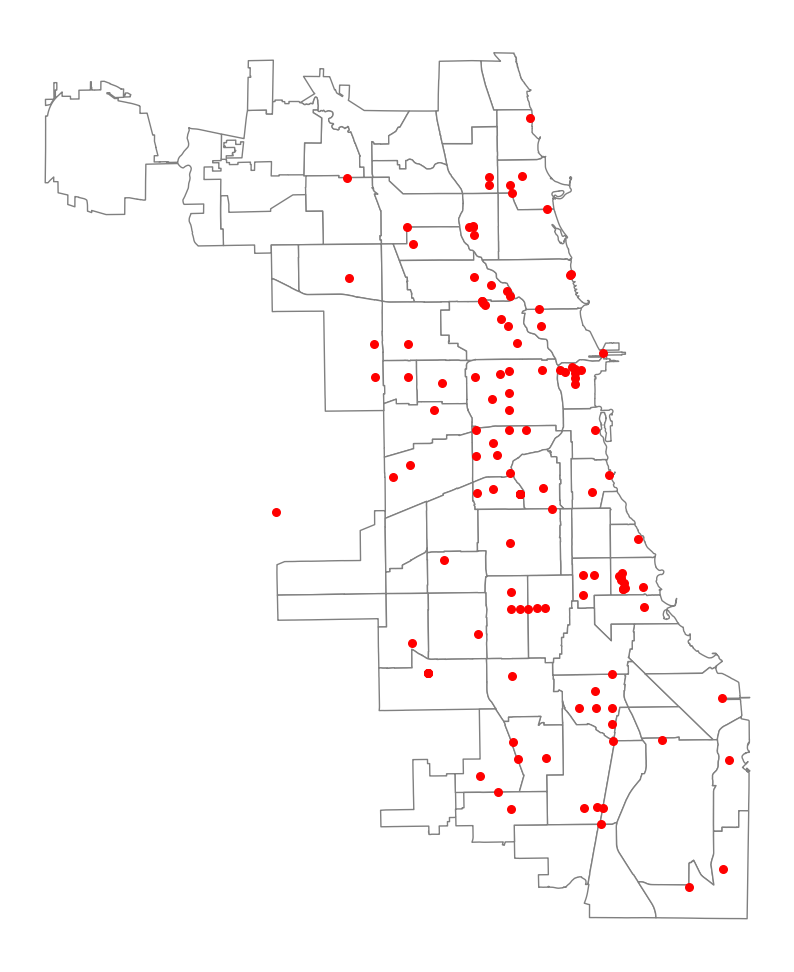

In [86]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10,15))
Chicago_community_areas.plot(ax=ax,color='white', edgecolor='gray')
AoT_nodes_gdf.plot(ax=ax,markersize=30,legend=True,legend_kwds={'loc': 'lower left'},c='r')
ax.axis('off')
plt.show()

AoT在芝加哥布局了126个测量点位，位于道路街口，临湖道路、芝加哥大学校园内、或者邻近较大公园的附近道路、及中心城区、高速等不同环境，基本涵盖了芝加哥城全城区域。（为详细查看AoT在地图上的分布，可以转换`nodes`数据为.kml数据后，在[Google Earth](https://earth.google.com/web/)<sup>④</sup>下读入）

`nodes.csv`读取的节点元数据各字段解释如下（来源于`README.md`文件）：

* `node_id` - 节点ID；
* `project_id` - 节点管理项目ID；
* `vsn` - 节点的公共名称，并标识在传感器设备上；
* `address` - 节点安装的街道地址；
* `lat` - 纬度；
* `lon` - 经度；
* `description` - 对节点传感器构建和配置更详细的描述；
* `start_timestamp` - 节点安装的开始时间戳；
* `end_timestamp` - 节点安装结束的时间戳。

### 2.7.1.2 AoT数据预处理

"AoT_Chicago.complete.2022-08-31"数据包括2018-01-01至2022-08-31多年采集的数据，如果将其中33.7GB的“data.csv.gz”直接解压为CSV格式数据，预计占用几百GB空间，因此建议首先根据分析目的提取数据，这里提取了2021年份的所有数据，提取及预处理的的方法参考[Waggle Data Tools](https://github.com/waggle-sensor/data-tools)<sup>⑤</sup>提供的工具，该工具用于操作、提取、减少和绘制由基于Waggle的节点（包括AoT节点和Waggle Ugly-Nodes）生成的数据。

#### 1) 按时间范围提取数据

AoT数据中包含有"offsets.csv"数据，该数据记录有对应时间的字节偏移量和大小，因此可以根据指定的时间（精确到日期）范围提取数据，提高数据分析的效率。`parse_date_string()`函数用于转换字符串为时间格式，`AoT_load_offsets()`用于读取“offsets.csv”数据，`AoT_slice_data_range()`则按给定的时间范围（"2020-01-01"-"2020-12-31"）提取“data.csv.gz”中的数据，并单独保存为独立的压缩文件（“data_2020.csv.gz”），同时也保存了该文件按时间划分的字节偏移量文件“offsets.csv”（与数据文件位于同一文件夹下）。提取2020年的数据后，压缩文件大小为2.88GB，解压后的CSV格式文件为30.1GB。

In [233]:
def parse_date_string(s):
    '''    
    格式化时间字符串，包括'%Y/%m/%d'或'%Y-%m-%d'两种样式
        
    Parameters
    ----------
    s : string
        待格式化的时间字符串，例如"2021-12-31".

    Raises
    ------
    ValueError
        DESCRIPTION.

    Returns
    -------
    datetime.date
        格式化后的时间.

    '''    
    import datetime
    
    try:
        return datetime.datetime.strptime(s, '%Y/%m/%d').date()
    except ValueError:
        pass

    try:
        return datetime.datetime.strptime(s, '%Y-%m-%d').date()
    except ValueError:
        pass

    raise ValueError('Unknown date format.')

def AoT_load_offsets(filename):    
    '''    
    读取AoT的offsets.csv数据

    Parameters
    ----------
    filename : string
        offsets.csv文件路径.

    Returns
    -------
    list(dict('date','offset','size'))
        以字典列表形式返回读取的数据，字典的键为'date','offset','size'.

    '''    
    import csv    
    
    chunks = []
    with open(filename) as file:
        reader = csv.DictReader(file)
        for row in reader:
            chunks.append({
                'date': parse_date_string(row['date']),
                'offset': int(row['offset']),
                'size': int(row['size'])
            })
    return sorted(chunks, key=lambda row: row['date'])

chunks=AoT_load_offsets(cfg['AoT']['AoT_offsets_fp'])
print(chunks[:3])

[{'date': datetime.date(2018, 1, 1), 'offset': 77, 'size': 4440360}, {'date': datetime.date(2018, 1, 2), 'offset': 4440437, 'size': 4653654}, {'date': datetime.date(2018, 1, 3), 'offset': 9094091, 'size': 3914705}]


In [225]:
def AoT_slice_data_range(start_date_str,end_date_str,chunks,source_data_file,build_data_file):
    '''
    按给定的时间范围提取AoT数据

    Parameters
    ----------
    start_date_str : string
        开始时间，例如"2021-01-01".
    end_date_str : string
        结束时间，例如"2021-12-31".
    chunks :  list(dict('date','offset','size'))
        由函数AoT_load_offsets计算返回的结果，包含按时间的字节偏移量和大小.
    source_data_file : string
        AoT的压缩数据文件，后缀名通常为gz.
    build_data_file : string
        提取后的数据保存路径.

    Returns
    -------
    None.

    '''    
    import os
    import gzip
    import csv
    from pathlib import Path
    
    with gzip.open(source_data_file, 'rb') as file:
        compressed_header=gzip.compress(file.readline())
    
    start_date=parse_date_string(start_date_str)
    end_date=parse_date_string(end_date_str)
    chunks_in_range=[c for c in chunks if start_date <= c['date'] <= end_date]
    
    offsets=[]
    with open(build_data_file, 'wb') as outfile:
        print('Appending header.')
        outfile.write(compressed_header)
        with open(source_data_file, 'rb') as infile:
            for chunk in chunks_in_range:
                print('Appending chunk for {}.'.format(chunk['date']),end='\r') # Printing over the same line in Python replaces a printed statement with another printed statement.
                offset=outfile.tell() 
                infile.seek(chunk['offset'])
                data=infile.read(chunk['size'])
                size=outfile.write(data)
                offsets.append([chunk['date'], offset, size])
                
    build_data_file_path=Path(build_data_file)    
    with open(os.path.join(build_data_file_path.parent.absolute(), 'offsets.csv'), 'w') as file:
        writer=csv.writer(file)
        writer.writerow(['date', 'offset', 'size'])
        writer.writerows(offsets)

source_data_file=cfg['AoT']["AoT_data_gz_fp"]      
build_data_file="D:\AoT\AoT_slice\data_2020.csv.gz"
AoT_slice_data_range("2020-01-01","2020-12-31",chunks,source_data_file,build_data_file)

#### 2) 数值有效区间

在“sensors.csv”文件中提供了传感器测量值域，因此需要根据值域`valid_hrf_range`字典筛选有效数据。值域由字段`subsystem`、`sensor`和`parameter`的组合确定，因此以该3个字段组合为键，通过对应值域判断值的有效性。定义`AoT_valid_hrf()`函数，通过`invalid_note`参数选择不同的输出结果，包括删除无效数据行和保留无效行，但增加`valid`和`errors`字段，标识无效数据行。

对于大数据文件的处理，因为可能受到内存容量的限制，因此并未使用`pandas.read_csv()`等方法一次性读取所有数据的方法，而是通过[csv](https://docs.python.org/3/library/csv.html)<sup>⑥</sup>库提供的逐行读取和写入的方式处理数据。移除无效数据后，2020年CSV格式数据由原来的30.1GB缩小为为22.3GB，计算时长约3小时左右。

> 下述代码需要存储为单独的`.py`模块，在Spyder解释器中运行。因为数据量较大，如果在Jupyter或JupyterLab中运行，可能会提示“jupterlab IOPub data rate exceeded.”等错误。

In [1]:
inf=float('inf')

valid_hrf_range = {
    ('chemsense', 'co', 'concentration'): (0, 1000),
    ('chemsense', 'h2s', 'concentration'): (0, 50),
    ('chemsense', 'no2', 'concentration'): (0, 20),
    ('chemsense', 'o3', 'concentration'): (0, 20),
    ('chemsense', 'oxidizing_gases', 'concentration'): (0, 100),
    ('chemsense', 'reducing_gases', 'concentration'): (0, 20),
    ('chemsense', 'so2', 'concentration'): (0, 20),
    ('alphasense', 'opc_n2', 'bins'): (0, inf),
    ('plantower', 'pms7003', '10um_particle'): (0, inf),
    ('plantower', 'pms7003', '1um_particle'): (0, inf),
    ('plantower', 'pms7003', '2_5um_particle'): (0, inf),
    ('plantower', 'pms7003', '5um_particle'): (0, inf),
    ('plantower', 'pms7003', 'point_3um_particle'): (0, inf),
    ('plantower', 'pms7003', 'point_5um_particle'): (0, inf),
    ('alphasense', 'opc_n2', 'pm1'): (0, inf),
    ('plantower', 'pms7003', 'pm1_atm'): (0, inf),
    ('alphasense', 'opc_n2', 'pm10'): (0, inf),
    ('plantower', 'pms7003', 'pm10_atm'): (0, inf),
    ('alphasense', 'opc_n2', 'pm2_5'): (0, inf),
    ('plantower', 'pms7003', 'pm25_atm'): (0, inf),
    ('metsense', 'hih4030', 'humidity'): (0, 100),
    ('metsense', 'htu21d', 'humidity'): (0, 100),
    ('metsense', 'bmp180', 'pressure'): (300, 1100),
    ('metsense', 'bmp180', 'temperature'): (-40, 85),
    ('metsense', 'htu21d', 'temperature'): (-40, 125),
    ('metsense', 'pr103j2', 'temperature'): (-55, 80),
    ('metsense', 'tmp112', 'temperature'): (-40, 125),
    ('metsense', 'tsys01', 'temperature'): (-40, 125),
    ('audio', 'microphone', 'octave_1_intensity'): (-inf, 140),
    ('audio', 'microphone', 'octave_10_intensity'): (-inf, 140),
    ('audio', 'microphone', 'octave_2_intensity'): (-inf, 140),
    ('audio', 'microphone', 'octave_3_intensity'): (-inf, 140),
    ('audio', 'microphone', 'octave_4_intensity'): (-inf, 140),
    ('audio', 'microphone', 'octave_5_intensity'): (-inf, 140),
    ('audio', 'microphone', 'octave_6_intensity'): (-inf, 140),
    ('audio', 'microphone', 'octave_7_intensity'): (-inf, 140),
    ('audio', 'microphone', 'octave_8_intensity'): (-inf, 140),
    ('audio', 'microphone', 'octave_9_intensity'): (-inf, 140),
    ('audio', 'microphone', 'octave_total_intensity'): (-inf, 140),
    ('lightsense', 'tsl260rd', 'intensity'): (0, 132),
    ('lightsense', 'apds_9006_020', 'intensity'): (0, 1000),
    ('lightsense', 'mlx75305', 'intensity'): (0, 160),
    ('lightsense', 'tsl250rd', 'intensity'): (0, 124),
    ('lightsense', 'hmc5883l', 'magnetic_field_x'): (-8000, 8000),
    ('lightsense', 'hmc5883l', 'magnetic_field_y'): (-8000, 8000),
    ('lightsense', 'hmc5883l', 'magnetic_field_z'): (-8000, 8000),
    ('metsense', 'spv1840lr5h_b', 'intensity'): (0, 121),
    ('lightsense', 'ml8511', 'intensity'): (0, 15),
    ('metsense', 'mma8452q', 'acceleration_x'): (-8000, 8000),
    ('metsense', 'mma8452q', 'acceleration_y'): (-8000, 8000),
    ('metsense', 'mma8452q', 'acceleration_z'): (-8000, 8000),
    ('ep', 'loadavg', 'load_1'): (0, inf),
    ('ep', 'loadavg', 'load_10'): (0, inf),
    ('ep', 'loadavg', 'load_5'): (0, inf),
    ('ep', 'mem', 'free'): (0, inf),
    ('ep', 'mem', 'total'): (0, inf),
    ('ep', 'uptime', 'idletime'): (0, inf),
    ('ep', 'uptime', 'uptime'): (0, inf),
    ('lightsense', 'hih6130', 'humidity'): (0, 100),
    ('chemsense', 'si1145', 'ir_intensity'): (0, inf),
    ('chemsense', 'si1145', 'visible_light_intensity'): (0, inf),
    ('lightsense', 'hih6130', 'temperature'): (-25, 85),
    ('wagman', 'htu21d', 'humidity'): (0, 100),
    ('wagman', 'htu21d', 'temperature'): (-40, 125),
    ('wagman', 'temperatures', 'battery'): (-55, 125),
    ('wagman', 'temperatures', 'brainplate'): (-55, 125),
    ('wagman', 'temperatures', 'ep_heatsink'): (-55, 125),
    ('wagman', 'temperatures', 'nc_heatsink'): (-55, 125),
    ('wagman', 'temperatures', 'powersupply'): (-55, 125),
    ('lightsense', 'tmp421', 'temperature'): (-55, 127),
    ('chemsense', 'si1145', 'uv_intensity'): (-inf, inf),
    ('nc', 'loadavg', 'load_1'): (0, inf),
    ('nc', 'loadavg', 'load_10'): (0, inf),
    ('nc', 'loadavg', 'load_5'): (0, inf),
    ('nc', 'mem', 'free'): (0, inf),
    ('nc', 'mem', 'total'): (0, inf),
    ('nc', 'net_broadband', 'rx'): (0, inf),
    ('nc', 'net_broadband', 'tx'): (0, inf),
    ('nc', 'net_lan', 'rx'): (0, inf),
    ('nc', 'net_lan', 'tx'): (0, inf),
    ('nc', 'net_usb', 'rx'): (0, inf),
    ('nc', 'net_usb', 'tx'): (0, inf),
    ('nc', 'uptime', 'idletime'): (0, inf),
    ('nc', 'uptime', 'uptime'): (0, inf),
    ('alphasense', 'opc_n2', 'sample_flow_rate'): (-inf, inf),
    ('chemsense', 'lps25h', 'pressure'): (260, 1260),
    ('chemsense', 'sht25', 'humidity'): (0, 100),
    ('chemsense', 'chemsense', 'id'): (-inf, inf),
    ('metsense', 'metsense', 'id'): (-inf, inf),
    ('alphasense', 'opc_n2', 'fw'): (-inf, inf),
    ('metsense', 'tsl250rd', 'intensity'): (0, 124),
    ('chemsense', 'lps25h', 'temperature'): (-30, 105),
    ('alphasense', 'opc_n2', 'sampling_period'): (-inf, inf),
    ('chemsense', 'at0', 'temperature'): (-40, 125),
    ('chemsense', 'at1', 'temperature'): (-40, 125),
    ('chemsense', 'at2', 'temperature'): (-40, 125),
    ('chemsense', 'at3', 'temperature'): (-40, 125),
    ('chemsense', 'sht25', 'temperature'): (-40, 125),
    ('wagman', 'current', 'cs'): (0, 8000),
    ('wagman', 'current', 'ep'): (0, 8000),
    ('wagman', 'current', 'nc'): (0, 8000),
    ('wagman', 'current', 'wagman'): (0, 8000),
    ('wagman', 'failures', 'cs'): (0, inf),
    ('wagman', 'failures', 'ep'): (0, inf),
    ('wagman', 'failures', 'nc'): (0, inf),
    ('wagman', 'heartbeat', 'cs'): (0, inf),
    ('wagman', 'heartbeat', 'ep'): (0, inf),
    ('wagman', 'heartbeat', 'nc'): (0, inf),
    ('wagman', 'enabled', 'cs'): (0, 1),
    ('wagman', 'enabled', 'ep'): (0, 1),
    ('wagman', 'enabled', 'nc'): (0, 1),
    ('wagman', 'uptime', 'uptime'): (0, inf),
}

def between(x, r):
    '''
    判断值x是否在区间r中

    Parameters
    ----------
    x : float
        待判断的数值.
    r : tuple(float)
        区间，含两个数值.

    Returns
    -------
    bool
        如果x在r区间，返回True，否则返回False.

    '''    
    return r[0] <= x and x <= r[1]

def validator(x, s):
    '''
    判断值x是否在键为s对应的区间中，需要调用between()函数

    Parameters
    ----------
    x : float
        待判断的数值.
    s : tuple(string)
        从valid_hrf_range字典提取值（区间）的键，例如('chemsense', 'at0', 'temperature').

    Returns
    -------
    bool
         如果x在r区间，返回True，否则返回False.

    '''    
    return between(x, valid_hrf_range[s])

def AoT_valid_hrf(data_fp,output_fp,invalid_note=True):
    '''
    检测AoT传感器测量数据的有效性，并存储标识或者移除无效数据行的文件

    Parameters
    ----------
    data_fp : string
        AoT数据文件，CSV格式.
    output_fp : string
        存储有效性检测后的数据为CSV格式文件.
    invalid_note : bool, optional
        为True时，存储文件保留无效行，增加字段'valid'和'errors'标识；为False时，则直接移除无效数据行. The default is True.

    Returns
    -------
    None.

    '''    
    import argparse
    import csv
    import sys
    from tqdm import tqdm
        
    output=open(output_fp,"w")
    writer=csv.writer(output)
    if invalid_note:
        writer.writerow([
                'timestamp',
                'node_id',
                'subsystem',
                'sensor',
                'parameter',
                'value_raw',
                'value_hrf',
                'valid',
                'errors',
            ])
    else:
        writer.writerow([
                        'timestamp',
                        'node_id',
                        'subsystem',
                        'sensor',
                        'parameter',
                        'value_raw',
                        'value_hrf',
                    ])
    
    with open(data_fp, "r") as file:
        reader=csv.DictReader(x.replace('\0', 'NullVal') for x in file)
        print(f"field names:{reader.fieldnames}")
        i=0
        for row in tqdm(reader):
            series=(row['subsystem'], row['sensor'], row['parameter'])
            # print(series)
            errors = []
            
            try:
                value_hrf=float(row['value_hrf'])
            except ValueError:
                continue  

            try:
                valid=validator(value_hrf, series)
            except KeyError:
                errors.append('noent')  
                
            if not valid:
                errors.append('range')     
            
            if invalid_note:
                writer.writerow([
                    row['timestamp'],
                    row['node_id'],
                    row['subsystem'],
                    row['sensor'],
                    row['parameter'],
                    row['value_raw'],
                    row['value_hrf'],
                    int(valid),
                    ' '.join(errors),
                ])     
            else:
                if valid:
                    writer.writerow([
                        row['timestamp'],
                        row['node_id'],
                        row['subsystem'],
                        row['sensor'],
                        row['parameter'],
                        row['value_raw'],
                        row['value_hrf'],
                    ])                  
            
            if i==10:break
            i+=1
    output.close()    

In [2]:
data_fp='D:\AoT\AoT_slice\data_2020.csv'
output_fp='D:\AoT\AoT_slice\data_temp.csv'    
AoT_valid_hrf(data_fp,output_fp,invalid_note=False)

field names:['timestamp', 'node_id', 'subsystem', 'sensor', 'parameter', 'value_raw', 'value_hrf']


#### 3) 数据精度处理

提取的2020年数据文件名为“data_2020.csv.gz”，解压后的CSV格式文件约30GB，如果直接分析该数据文件，对于普通电脑内存64GB或者更小存储容量的配置，则可能造成内存溢出；同时，需要根据分析目的确定数据的时间精度，例如最小时精度的环境测量数据分析，则可以将时间精度通过求均值、最大值和最小值的方式调整到1小时，这能够大幅度降低数据量，处理后的CSV格式数据大小为466MB。

调整数据精度的方法移植与参考[Waggle Data Tools](https://github.com/waggle-sensor/data-tools)提供的`data-reduction-tool`包下`dataReduction`模块。`Waggle Data Tools`提供的工具，使用了[argparse](https://docs.python.org/3/library/argparse.html)<sup>⑦</sup>库配置参数，从而可以在终端（terminal）命令行界面下执行。为了直接在Python解释器下直接运行代码，对参数的配置做了调整，这里使用“Cityscapes数据集——参数管理”部分定义的类`AttrDict`给出的参数存储方法，将该类置于`util_misc`模块下，通过`from util_misc import AttrDict`方式调用。参数配置时，实例化对象`AttrDict`为变量`__C`，并赋值给变量`args`，需要配置的参数放置在了实例化对象“根属性”下，包括配置时间精度的`period`属性，可以配置's'秒、'm'分、'h'时和 'd'天4种精度单位，在单位之前可以配置大小，例如`1h`代码精度为一个小时，`30m`则为30分钟等。`path`为待处理的AoT数据根目录，需要将压缩文件解压缩为CSV格式文件，并调整文件名为`data.csv`。`printLine`属性为计算时是否打印处理进度，行数信息，如果打印则根据`lines`属性配置多少行打印一次。`beginMinMaxCalcs`属性用于计算最大、最小值时配置的数量要求。除了配置参数外，将自动生成和更新的参数置于实例化对象`extraction`“子属性”下。通过类`AttrDict`定义的属性字典，替换使用`global`定义全局变量的方式，方便参数的管理；在不同函数中调用时，也能够明确变量是否为配置参数，方便代码书写。

定义的三个函数，`AoT_reduction_setu()`为参数配置，更新`extraction`下的属性参数；` AoT_reduction_createData()`为数据精度处理计算，并把计算结果存储于`__C.extraction.outputDict`（即`args.extraction.outputDict`）变量下。因为使用了`collections`库下的`OrderedDict`数据格式，可以顺序以字典形式存储数据，保持时间顺序不变；`AoT_reduction_writeFile()`函数，计算均值并将数据存储到更新的文件目录下。

调整数据精度需要逐行读取数据，这个计算过程较长，对于提取的2020年数据（已移除无效数据行）调整为1小时精度，花费22717.25秒，约为6.31个小时，调整后的CSV格式数据大小为265MB。

In [2]:
from collections import OrderedDict
from util_misc import AttrDict
__C=AttrDict() 
args=__C

# 配置参数
__C.period='1h' # Rows condense over this amt of time. Type an int followed by 's','m','h',or 'd' (e.g. '-t 30m').
__C.path=cfg['AoT']['AoT_path']  # 待处理的AoT数据根目录
__C.printLines=True # 是否打印计算进度，行信息
__C.lines=1000 # 打印计算进度时，多少行更新一次信息
__C.beginMinMaxCalcs=1000 # if there are more than *beginMinMaxCalcs* values in the averaging period, add min and max to output file

# 默认参数（自动更新）
__C.extraction=AttrDict()
__C.extraction.inputFile=''
__C.extraction.outputFile=''
__C.extraction.fieldNames=[]
__C.extraction.outputDict=OrderedDict()
__C.extraction.period=0
__C.extraction.minmax=False
__C.extraction.dirPath=''
__C.extraction.subDir=''
__C.extraction.hrfTitle=''
__C.extraction.fileName=''
print(args)

{'period': '1h', 'path': 'D:\\AoT\\AoT_slice', 'printLines': True, 'lines': 1000, 'beginMinMaxCalcs': 1000, 'extraction': {'inputFile': '', 'outputFile': '', 'fieldNames': [], 'outputDict': OrderedDict(), 'period': 0, 'minmax': False, 'dirPath': '', 'subDir': '', 'hrfTitle': '', 'fileName': ''}}


In [4]:
def AoT_reduction_setup(args): 
    '''    
    更新extraction下的属性参数

    Parameters
    ----------
    args : Class(dict)
        AttrDict方法的参数配置.

    Returns
    -------
    None.

    '''    
    import os
    import re
    from pathlib import Path
    
    #check that path exists and contains the necessary files
    if os.path.exists(args.path):
        args.extraction.dirPath=str(args.path)
        if not os.path.isfile(str(args.extraction.dirPath+"/data.csv")) or not os.path.isfile(str(args.extraction.dirPath+"/nodes.csv")) or not os.path.isfile(str(args.extraction.dirPath+"/sensors.csv")) or not os.path.isfile(str(args.extraction.dirPath+"/provenance.csv")) or not os.path.isfile(str(args.extraction.dirPath+"/README.md")):
            print("Error: Files missing from input directory path.")
            exit(1)
    else:
        print("Error: Path does not exist. Specify full path to unpackaged complete node data set")
        exit(1);
 
    # remove trailing slash if user includes it
    if (str(args.extraction.dirPath[-1:])=="/"):
        args.extraction.dirPath=args.extraction.dirPath[:-1]     
        
    # set the input file (full path to file) 
    args.extraction.inputFile=args.extraction.dirPath+"/data.csv"        
        
    # make sure user specifies a time period
    if args.period==None:
        print("Error: No time value given. Must be an int followed by 's','m','h',or 'd'.")
        exit(1)
        
    if not re.match(r"[0-9]+[s,m,h,d]{1}$| [0-9]+[s,m,h,d]{1}$|[0-9]+[s,m,h,d]{1} $| [0-9]+[s,m,h,d]{1} $",args.period):
        print("Error: Time value must be an int followed by 's','m','h',or 'd'.")
        exit(1)
        
    interval=args.period[-1:]
    numInterval=abs(int(args.period[0:-1]))        
    # print(interval,numInterval)
    
    if (numInterval < 1):
        print("Error: Time value must be a positive integer greater than 0.")
        exit(1)    
    
    # convert user input time period into seconds - must be at least 24 seconds
    if interval=='s':
        if(numInterval<24):
            print("Error: Time value cannot be less than 24 seconds.")
            exit(1)
        else:
            args.extraction.period=numInterval
    elif interval=='m':
        args.extraction.period=numInterval*60
    elif interval == 'h':
        args.extraction.period=numInterval*60*60
    elif interval=='d':
        args.extraction.period=numInterval*24*60*60
    else:
        args.extraction.period=numInterval        
        
    # create path names
    dp=Path(args.extraction.dirPath)
    parentDir=dp.parent.absolute()  
    args.extraction.subDir=str(parentDir.joinpath(dp.name+"_reduced_data_" + str(args.extraction.period)))
    fileName=parentDir.joinpath(dp.name+"_reduced_data_" + str(args.extraction.period) + "/data.csv")
    args.extraction.fileName=str(fileName)
    args.extraction.outputFile=args.extraction.fileName

In [5]:
AoT_reduction_setup(args)
print(args)

{'period': '1h', 'path': 'D:\\AoT\\AoT_slice', 'printLines': True, 'lines': 1000, 'beginMinMaxCalcs': 1000, 'extraction': {'inputFile': 'D:\\AoT\\AoT_slice/data.csv', 'outputFile': 'D:\\AoT\\AoT_slice_reduced_data_3600\\data.csv', 'fieldNames': [], 'outputDict': OrderedDict(), 'period': 3600, 'minmax': False, 'dirPath': 'D:\\AoT\\AoT_slice', 'subDir': 'D:\\AoT\\AoT_slice_reduced_data_3600', 'hrfTitle': '', 'fileName': 'D:\\AoT\\AoT_slice_reduced_data_3600\\data.csv'}}


In [ ]:
def AoT_reduction_createData(args):
    '''
    数据精度处理计算

    Parameters
    ----------
    args : Class(dict)
        AttrDict方法的参数配置， AoT_reduction_setup()更新后参数.

    Returns
    -------
    None.

    '''    
    import csv
    import datetime    
    
    valStr=''
    count=0
    newVal=''
    currMax=0
    currMin=0
    
    timeRange={"beginTime":0,"endTime":0}
    
    with open(args.extraction.inputFile, "r") as file:
        # create a csv reader object (it is an Ordered Dictionary of all the rows from the .csv file)
        # populate the fieldNames variable to place at the top of the output .csv file
        # replace any null values so that no errors occur
        reader=csv.DictReader(x.replace('\0', 'NullVal') for x in file)
        args.extraction.fieldNames=reader.fieldnames        
        print(f"field names:{args.extraction.fieldNames}")
        # sensor values can come from the original data set or the moving average tool; otherwise, the tool cannot function
        for i in range(0,len(args.extraction.fieldNames)):
            if (args.extraction.fieldNames[i]=="value_hrf"):
                args.extraction.hrfTitle="value_hrf"
            elif (args.extraction.fieldNames[i]=="value_hrf_moving_average"):
                args.extraction.hrfTitle="value_hrf_moving_average"    
            
        if (args.extraction.hrfTitle!="value_hrf" and args.extraction.hrfTitle!="value_hrf_moving_average"):
            print("Error: Could not find appropriate value header. CSV file headers must include either 'value_hrf' or 'value_hrf_moving_average'.")
            exit(1)        
                
        # go through each line of the input .csv file
        for row in reader:
            count=count + 1                
            # print number of lines parsed every *lines* amount of lines
            if (args.printLines==True) and (count % args.lines==0):
                print(count,end="\r")  
                
            #start the output evenly at the day, hour, or minute,
            if (count == 1):                
                hours = int(datetime.datetime.strptime(row['timestamp'], '%Y/%m/%d %H:%M:%S').hour)
                minutes = int(datetime.datetime.strptime(row['timestamp'], '%Y/%m/%d %H:%M:%S').minute)
                seconds = int(datetime.datetime.strptime(row['timestamp'], '%Y/%m/%d %H:%M:%S').second)
                difference = hours*60*60 + minutes*60 + seconds
                
                timeRange["beginTime"] =  (datetime.datetime.strptime(row['timestamp'],'%Y/%m/%d %H:%M:%S') - datetime.datetime(1970,1,1)).total_seconds()
                timeRange["beginTime"] = timeRange["beginTime"] - difference
                timeRange["endTime"] = timeRange["beginTime"] + args.extraction.period
                
            #set the new beginning and new end of the time range
            #if there is a gap in the data, this while loop runs until it hits the next timestamp
            while (timeRange["endTime"] < (datetime.datetime.strptime(row['timestamp'],'%Y/%m/%d %H:%M:%S') - datetime.datetime(1970,1,1)).total_seconds()):
                timeRange["beginTime"] = timeRange["endTime"]
                timeRange["endTime"] = timeRange["endTime"] + args.extraction.period
                
                
            # create the temporary dictionary (uses each sensor's value_hrf (or value_hrf_moving_average) as part of the value for each of the keys in outputDict) to hold
            # the sum, count, min, and max of the sensor hrf values over the specified time period
            if (',' in row[args.extraction.hrfTitle]):
                newVal='"'+ row[args.extraction.hrfTitle] +'"' # corrects error if commas are included in a sensor value
            else:
                newVal=row[args.extraction.hrfTitle]
            temp={'sum':newVal,'count':1, 'max':newVal, 'min':newVal}          
            
            # delete value columns so that when getting all columns, they can just be used as the dict key
            # (value_raw will most likely not be used by end user and does not make sense to keep track of)
            del row[args.extraction.hrfTitle]   
            
            # delete the value_raw, value_hrf_sum, and value_hrf_count columns if they exist
            try:
                del row['value_raw']
            except:
                pass
            try:
                del row['value_hrf_sum']
            except:
                pass
            try:
                del row['value_hrf_count']
            except:
                pass       
            
            # iterate through the dictionary to generate the outputDict for each time period
            for k,v in row.items():
                # concatenate fields to be used as dictionary keys except value_hrf (or value_hrf_moving_average) (to be used as part of dictionary values) and value_raw (deleted)
                # edit timestamp (to be used as part of dictionary keys - this is what determines how many rows from the input .csv file will be condensed into one row)
                # timestamp adjusted based on timeRange from code above generated by user input - timestamp is also halfway between the previous period and next period                    
                if k=='timestamp':
                    valStr=valStr + str(datetime.datetime.utcfromtimestamp(timeRange["endTime"] - args.extraction.period/2).strftime('%Y/%m/%d %H:%M:%S'))
                else:
                    valStr=valStr + ',' + str(v)    
                    
            # if the key already exists (meaning the row has already been made and now the current value_hrf (or value_hrf_moving_average) just needs to be added to the sum and the count value needs to be incremented)
            # then try to set the value of the dictionary key (key is in the format: timestamp,node_id,subsystem,sensor,parameter) - skips any values that are 'NA' or are a mix of letters and numbers
            # dictionary value is another dictionary in the format: {'sum':sum,'count':count,'min':min,'max':max}
            # else just update the outputDict with the temporary dictionary created above that contains the first value_hrf(or value_hrf_moving_average) for the current key
            if row["subsystem"]=="metsense" and row["sensor"]=="pr103j2":
                a=row["timestamp"]
                if a>"2020/02/02 01:00:00" and a<"2020/02/02 02:00:00":
                    print(f"{a}------------;{valStr}")
            if valStr in args.extraction.outputDict:                
                try:
                    # calculate min and max
                    currMax=max(float(newVal),float(args.extraction.outputDict[valStr]['max']))
                    currMin=min(float(newVal),float(args.extraction.outputDict[valStr]['min']))

                    args.extraction.outputDict[str(valStr)] = {'sum':str(float(args.extraction.outputDict[valStr]['sum'])+float(temp['sum'])),'count':args.extraction.outputDict[str(valStr)]['count']+1,'min':currMin,'max':currMax}

                    # if there are more than *beginMinMaxCalcs* values in the averaging period, add min and max to output file
                    if float(args.extraction.outputDict[str(valStr)]['count']) > args.beginMinMaxCalcs:
                        args.extraction.minmax=True
                except ValueError:
                    pass
            else:
                args.extraction.outputDict[str(valStr)] = temp
            valStr = ''            
            
            if count==100000000:break # 调试用
AoT_reduction_createData(args)            

field names:['timestamp', 'node_id', 'subsystem', 'sensor', 'parameter', 'value_raw', 'value_hrf']


In [6]:
def AoT_reduction_writeFile(args):
    '''
    计算均值并将数据存储到更新的文件目录下

    Parameters
    ----------
    args : Class(dict)
        AttrDict方法的参数配置， AoT_reduction_setup()更新后参数.

    Returns
    -------
    None.

    '''    
    import os
    import errno
    
    summation=0.0
    avg=0.0
    minimum=0.0
    maximum=0.0
    count=0
    
    # create the sub directory that will contain the reduced data and the copied metadata files
    if not os.path.exists(os.path.dirname(args.extraction.fileName)):
        try:
            os.makedirs(os.path.dirname(args.extraction.fileName))
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise
    
    # erase whatever is currently in output csv file
    open(args.extraction.outputFile,'w').close()    
    
    # now should have a dictionary with key value pairs in the following format (keys are shown as their titles but in the actual dictionary are the actual values):
    # {'timestamp,node_id,subsystem,sensor,parameter':{'sum':sum,'count':count,'min':min,'max':max}}

    # update the output csv file's first line with the field names (removing 'value_hrf' (or 'value_hrf_moving_average') and 'value_raw') in the following format:
    # timestamp,node_id,subsystem,sensor,parameter,value_hrf_sum,value_hrf_count,value_hrf_average or timestamp,node_id,subsystem,sensor,parameter,value_hrf_sum,value_hrf_count,value_hrf_average,value_hrf_min,value_hrf_max
    with open (args.extraction.outputFile,'w') as f:    
        # remove un used field names
        try:
            args.extraction.fieldNames.remove('value_raw')
        except:
            pass
        try:
            args.extraction.fieldNames.remove('value_hrf_count')
        except:
            pass
        try:
            args.extraction.fieldNames.remove('value_hrf_sum')
        except:
            pass
        
        args.extraction.fieldNames.remove(args.extraction.hrfTitle)

        for i in range(0,len(args.extraction.fieldNames)):
            f.write(str(args.extraction.fieldNames[i])+',')

        # if there are more than *beginMinMaxCalcs* values in the averaging period, add min and max to output file
        if args.extraction.minmax==True:
            f.write('value_hrf_sum,value_hrf_count,value_hrf_average,value_hrf_min,value_hrf_max\n')
        else:
            f.write('value_hrf_sum,value_hrf_count,value_hrf_average\n')        
    
    # create the final output file
    with open (args.extraction.outputFile,'a') as f:    
        # for each item in the dictionary - calculate the average of each time period (row) using the sum and count
        # include the average in the value dictionary of outputDict
        for key,val in args.extraction.outputDict.items():
            avg=0
            summation=val['sum']
            minimum=val['min']
            maximum=val['max']
            count=val['count']
            
            try:
                avg=round(float(val['sum'])/val['count'],3)
                summation=round(float(val['sum']),3)
                minimum=round(float(val['min']),3)
                maximum=round(float(val['max']),3)
                val.update({'average':avg})
            except ValueError:
                val.update({'average':0})

            # write the whole row with the outputDict key (timestamp,node_id,subsystem,sensor,parameter) and the outputDict values (sum,count,average,max,min)
            # also include the average, max, and min if there are more than *beginMinMaxCalcs* values in the averaging period
            if args.extraction.minmax == True:    
                f.write(str(key)+','+str(summation)+','+str(count)+','+str(avg)+','+str(minimum)+','+str(maximum)+'\n')
            else:
                f.write(str(key)+','+str(summation)+','+str(count)+','+str(avg)+'\n')         

通过`AttrDict`方法配置参数，定义初始化参数、数值计算和数据存储等3个函数后，执行下述代码，完成数据精度的调整计算。

In [7]:
import time
# begin timer for benchmarking
timerStart=time.time()
AoT_reduction_setup(args)
#print(args)
AoT_reduction_createData(args)   
AoT_reduction_writeFile(args)

# end timer and show run time
timerEnd=time.time()
runTime=timerEnd-timerStart
print("-"*50)
print("Done. ",end="")
print("Took %.2fs to complete." % runTime)

field names:['timestamp', 'node_id', 'subsystem', 'sensor', 'parameter', 'value_raw', 'value_hrf']
--------------------------------------------------
Done. Took 22717.25s to complete.


将AoT的辅助信息文件“nodes.csv”、“provenance.csv”、“sensors.csv”和“README.md”复制到数据存储根目录下，并在“README.md”中增加了新的说明文字。

In [162]:
def AoT_reduction_copyDigestFiles(args):    
    import shutil
    import datetime 
    import subprocess
    
    dirPath=args.extraction.dirPath
    subDir=args.extraction.subDir

    # copy the metadata files that are from the parent directory
    try:
        shutil.copyfile(dirPath+"/nodes.csv",subDir+"/nodes.csv",follow_symlinks=True)
        shutil.copyfile(dirPath+"/provenance.csv",subDir+"/provenance.csv",follow_symlinks=True)
        shutil.copyfile(dirPath+"/sensors.csv",subDir+"/sensors.csv",follow_symlinks=True)
        shutil.copyfile(dirPath+"/README.md",subDir+"/README.md",follow_symlinks=True)
    except shutil.Error as e:
        print('Error: %s' % e)
    except IOError as e:
        print('Error: %s' % e.strerror)

    # modify the README, create new README, delete old README
    modifierText = """## NOTE: This README has been modifed by dataReduction.py, and the data included in this directory is now reduced.\n
                    Within this README, the 'data.csv.gz' archive is referred to as the compressed CSV containing the sensor data file (data.csv). The data.csv file from this compressed archive has been replaced by the reduced data.csv.
                    All other metadata mentioned in this README remains the same, except for the provenance metadata and the list of columns in data.csv.gz. Since this file no longer exists, these columns are incorrect.
                    The columns remain the same but 'value_raw' and 'value_hrf' do not exist in the new reduced data.csv file; instead, the columns now include either 'value_hrf_sum,value_hrf_count,value_hrf_average', or 'value_hrf_sum,value_hrf_count,value_hrf_average,value_hrf_min,value_hrf_max'
                    The provenance.csv file contains the provenance for the original data set. Provenance for reduced data:
                    New Provenance - This data was reduced and combined with the original digest metadata on """ + str(datetime.datetime.utcnow()) + ". It has been modifed by the dataReduction.py data reduction tool.\n\n"

    newReadme = subDir + "/reducedREADME.md"
    oldReadme = subDir+"/README.md"
    with open (newReadme,'w') as n, open (oldReadme, "r") as o:
        text = o.read()
        n.write(modifierText+text)

AoT_reduction_copyDigestFiles(args)

#### 4)  分类数据

气体类、颗粒物、热环境、噪音、光等传感器测量的数据均混合写在`data`文件下。需要将数据测量内容分离出来单独保存，具体测量内容包含于`data`数据的`parameter`字段。对于`parameter`下的`concentration`（气体浓度测量值）仍然需要依靠`sensor`进一步细分为CO, H<sub>2</sub>S, NO<sub>2</sub>, O<sub>3</sub>, SO<sub>2</sub>, oxidizing_gases和reducing_gases等气体。

定义函数`total_sample_length_csv()`可以辅助查看CSV格式文件存储的数据条数。传递的参数`chunksize`可以定义一次读取的行数，来应对大数据文件对内存的需求。同时基于大数据文件的考虑，在分类数据时使用了`multiprocessing`库提供的多线程方法，提高计算的速度，由定义的函数`AoT_data_category_poo()`、`AoT_data_sort()`和`AoT_data_category_single`组成，其中后两个函数提供了给定分类列表，一次性i计算多个分类数据和只给一个分类数据提取的方式。同时给定`AoT_nodes`参数，传递读取的文件“nodes.csv”，读取为GeoDataFrame格式，其中包含经纬度信息。如果该参数为默认值`None`，则分类提取的数据使用`pickle`方式存储（.pkl）；如果传入了经纬度信息数据，则存储为`GeoPandas`库提供的.gpkg格式文件。

分类提取的数据也存入到PostgreSQL数据库。下述提取的分类数据包括`temperature`、`humidity`和`concentration`。

> JupyterLab支持多线程，因此分类计算可以在JupyterLab中直接运行计算。

In [11]:
def total_sample_length_csv(csv_fp,chunksize,category=None,save_fp=None):
    '''
    读取.csv样本数据，计算样本总长度（行数）;并给定分类字段，提取分类名并保存

    Parameters
    ----------
    csv_fp : string
        .csv文件路径.
    chunksize : int
        数据块大小（单独一次读取的行数）.
    category : string(column name), optional
        分类字段. The default is None.
    save_fp : string, optional
        分类名保存路径. The default is None.

    Returns
    -------
    category_set : set
        分类名集合.

    '''
    from tqdm.auto import tqdm
    import pandas as pd
    import pickle
    
    count=0
    set_list=[]
    for chunk in tqdm(pd.read_csv(csv_fp,chunksize=chunksize)):
        count+= 1 # 样本分组数
        last_len=len(chunk)  # 最后一组的样本数量
        if category:
            set_list.append(set(chunk[category]))
        # if count==3:break
            
    data_length=(count*chunksize+last_len-chunksize) # 数据行（样本）总长度
    print("数据行（样本）总长度={}".format(data_length)) 
    if category:
        category_set=set().union(*set_list)
        if save_fp:
            with open(save_fp,'wb') as f:
                pickle.dump(category_set,f)            
        return category_set

In [12]:
aot_data_processed_fp="D:\AoT\AoT_slice_reduced_data_3600\data.csv"
category_set=total_sample_length_csv(aot_data_processed_fp,chunksize=10**6,category='parameter')
print("-"*50)
print(category_set)

0it [00:00, ?it/s]

数据行（样本）总长度=3086327
--------------------------------------------------
{'load_5', 'intensity', 'concentration', 'octave_3_intensity', 'total', 'person_total', 'pm25_cf1', 'octave_10_intensity', 'mic', 'media', 'uptime', '5um_particle', 'count', 'octave_6_intensity', 'pm2_5', 'octave_8_intensity', 'soil_dielectric', 'top_camera', 'samba', 'root', 'loadavg5', 'free_ratio', 'tcam', 'r', 'patch', 'octave_1_intensity', 'point_3um_particle', 'wm', 'magnetic_field_x', 'rx', 'pm25_atm', 'octave_2_intensity', 'pm1_cf1', 'pm10', 'load_1', 'beehive', 'alphasense', 'onset_rain', 'used', 'commit', 'magnetic_field_y', 'sample_flow_rate', 'minor', 'active', 'octave_9_intensity', 'up', 'load_10', 'id', 'car_total', 'cs', 'coresense', 'soil_temperature', 'octave_total_intensity', '10um_particle', 'bottom_camera', 'time', 'enabled', '0', 'lan', 'tx', 'ep', 'loadavg1', 'bcam', 'octave_5_intensity', '2', 'major', '1', 'acceleration_z', 'pressure', 'free', 'loadavg15', 'g', 'b', 'acceleration_y', 'fw', 'oct

`data.csv(data.csv.gz)`数据文件包含的字段信息包括：

* `timestamp` - 测量了完成时的UTC（Coordinated Universal Time）时间戳；
* `node_id` - 用于测量的节点ID；
* `subsystem` - 包含传感器节点的子系统；
* `sensor` - 用于测量的传感器；
* `parameter` - 测量的传感器参数；
* `value_raw` - 来自传感器的原始测量值；
* `value_hrf` - 从传感器转换的“可读”值，即标准测量单位。

处理后的数据大幅度缩小了数据量，可以使用`pd.read_csv()`方法一次性读取所有数据。

`aot_data_category_pool.py`

In [14]:
import pandas as pd
import geopandas as gpd
import os
import pickle

def AoT_data_category_pool(category,args):
    '''
    读取AoT-data数据，并存储为.gpkg或者.pkl

    Parameters
    ----------
    category : string
        分类名.
    args : list
        变量列表.

    Returns
    -------
    category : string
        分类名。可以不定义返回值，该返回值即为输入值.

    '''
    
    data_fn,chunksize,category_column,save_path,AoT_nodes=args    
    category_fn_dict={}
    count=0
    temp=[]
    for chunk in pd.read_csv(data_fn,chunksize=chunksize):
        temp.append(chunk[chunk[category_column]==category])            
        count+= 1
        # if count==3:break
    category_df=pd.concat(temp)    
    # print("+"*50)
    # print(category_df)
    if category_df.empty is False:
        if AoT_nodes is not None:
            category_df=pd.merge(category_df,AoT_nodes,on="node_id")
            category_gdf=gpd.GeoDataFrame(category_df,crs=AoT_nodes.crs)
            category_fn=os.path.join(save_path,"{}.gpkg".format(category))
            category_gdf.to_file(category_fn,driver="GPKG")    
        else:
            category_fn=os.path.join(save_path,"{}.pkl".format(category))
            category_df.to_pickle(category_fn)
    else:
        return category

`aot_data_category.py`

In [16]:
from tqdm.auto import tqdm
from multiprocessing import Pool
from functools import partial
import pandas as pd
import geopandas as gpd
import os
import pickle 

from aot_data_category_pool import AoT_data_category_pool
from database import cfg_load_yaml,postSQL2gpd

def AoT_data_sort(data_fn,category_set,category_column,save_path,chunksize,AoT_nodes=None):
    '''
    多线程。读取AoT-data数据，并存储为.gpkg或者.pkl

    Parameters
    ----------
    data_fn : string
        AoT_data数据，传感器测量数据.
    category_set : list(string)
        data:parameter传感器测量分类字段列表.
    category_column : string
        判断分类的列表，即AoT-data的parameter字段.
    save_path : string
        文件保存的根目录.
    chunksize : int.
        分批读取数据一次读取的文件量（样本行）.
    AoT_nodes : GeoDataFrame, optional
        AoT-nodes节点信息数据，包含节点分布几何点（geometry）。如果给定该参数则保存为GPKG，否则保存为.pkl(pickle保存). The default is None.

    Returns
    -------
    category_none : list(string)
        已经保存的分类数据名列表.
    '''
    
    args=partial(AoT_data_category_pool, args=[data_fn,chunksize,category_column,save_path,AoT_nodes])
    with Pool(8) as p:
        category_none=p.map(args, tqdm(list(category_set))) #[:3]
        
    category_fn_dict={category:os.path.join(save_path,"{}.pkl".format(category)) for category in category_set}
    category_fn_dict_fn= os.path.join(save_path,"category_fn_dict.pkl")  
    with open(category_fn_dict_fn,'wb') as f:
        pickle.dump(category_fn_dict,f)
    return category_none    

def AoT_data_category_single(data_fn,category,category_column,save_path,AoT_nodes=None,chunksize=10**6):
    '''
    读取AoT-data数据，提取单个分类，并存储为.gpkg或者.pkl

    Parameters
    ----------
    data_fn : string
        AoT_data数据，传感器测量数据.
    category : string
        提取单个分类数据的分类名.
    category_column : string
        判断分类的列表，即AoT-data的parameter字段.
    save_path : string
        文件保存的根目录.
    AoT_nodes : GeoDataFrame,optional
        AoT-nodes节点信息数据，包含节点分布几何点（geometry）。如果给定该参数则保存为GPKG，否则保存为.pkl(pickle保存). The default is None.
    chunksize : int, optional
        分批读取数据一次读取的文件量（样本行）. The default is 10**6.

    Returns
    -------
    category : string
        分类名。可以不定义返回值，该返回值即为输入值.

    '''   
    
    count=0
    for chunk in pd.read_csv(data_fn,chunksize=chunksize):
        category_chunk_df=chunk[chunk[category_column]==category]          
        count+= 1  
        
        if category_chunk_df.empty is False:
            if AoT_nodes is not None:
                category_chunk_df=pd.merge(category_chunk_df,AoT_nodes,on="node_id")
                category_chunky_gdf=gpd.GeoDataFrame(category_chunk_df,crs=AoT_nodes.crs)
                category_chunk_fn=os.path.join(save_path,"{}_{}.gpkg".format(category,count))
                category_chunky_gdf.to_file(category_chunk_fn,driver="GPKG")    
            else:
                category_chunk_fn=os.path.join(save_path,"{}_{}.pkl".format(category,count))
                category_chunk_df.to_pickle(category_chunk_fn)
        else:
            return category 
        
if __name__=="__main__":
    cfg=cfg_load_yaml('./configuration/cfg_AoT.yml')  
    UN=cfg["postgreSQL"]["myusername"]
    PW=cfg["postgreSQL"]["mypassword"]
    DB=cfg["postgreSQL"]["mydatabase"] 
    GC='geometry'
    
    aot_data_processed_fp="D:\AoT\AoT_slice_reduced_data_3600\data.csv"    
    AoT_nodes_gdf=postSQL2gpd(table_name="AoT_nodes",geom_col=GC,myusername=UN,mypassword=PW,mydatabase=DB)    
    category_set=['temperature', 'humidity']
    AoT_data_category_save_fp="D:\AoT\AoT_slice_reduced_data_3600_category"
    
    category_none=AoT_data_sort(aot_data_processed_fp,category_set,'parameter',AoT_data_category_save_fp,chunksize=10**6,AoT_nodes=AoT_nodes_gdf) 
    _=AoT_data_category_single(aot_data_processed_fp,'concentration','parameter',AoT_data_category_save_fp,AoT_nodes_gdf,chunksize=10**8)

__________________________________________________
The data has been read from PostgreSQL database. The table name is AoT_nodes.


C:\Users\richi\anaconda3\envs\usda\lib\site-packages\pandas\io\sql.py:580: SAWarning: Did not recognize type 'geometry' of column 'geometry'
  pandas_sql.meta.reflect(bind=pandas_sql.connectable, only=[sql])


  0%|          | 0/2 [00:00<?, ?it/s]

读取分类提取的数据，按照时间顺序排序行，并将`timestamp`列存储的时间字符串数据格式化为`datetime`格式的数据，用于时间相关的计算。

In [5]:
import geopandas as gpd
from datetime import datetime

aot_temperature_gdf=gpd.read_file(r"D:\AoT\AoT_slice_reduced_data_3600_category\temperature.gpkg")     
aot_temperature_gdf.sort_values(by=["timestamp"],inplace=True)
aot_temperature_gdf["ts"]=aot_temperature_gdf.timestamp.apply(lambda row:datetime.strptime(row,'%Y/%m/%d %H:%M:%S'))
gpd2postSQL(aot_temperature_gdf,table_name="temperature",myusername=UN,mypassword=PW,mydatabase=DB)
aot_temperature_gdf

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is temperature.


,timestamp,node_id,subsystem,sensor,parameter,value_hrf_sum,value_hrf_count,value_hrf_average,value_hrf_min,value_hrf_max,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp,geometry,ts
0,2020/01/01 00:30:00,001e06112e77,lightsense,tmp421,temperature,-8.52,142,-0.060,-0.06,-0.06,AoT_Chicago,06B,Ashland Ave & 59th St Chicago IL,41.786756,-87.664343,AoT Chicago (S) [C],2018/02/26 00:00:00,None,POINT (444797.242 4626313.694),2020-01-01 00:30:00
350415,2020/01/01 00:30:00,001e061183bf,metsense,htu21d,temperature,-203.42,143,-1.423,-1.58,-1.21,AoT_Chicago,11A,ComEd Training Center,41.829806,-87.659467,AoT Chicago (S) [CP] {ComEd},2019/04/25 00:00:00,None,POINT (445239.085 4631090.243),2020-01-01 00:30:00
350416,2020/01/01 00:30:00,001e061183bf,metsense,pr103j2,temperature,-143.40,143,-1.003,-1.25,-0.65,AoT_Chicago,11A,ComEd Training Center,41.829806,-87.659467,AoT Chicago (S) [CP] {ComEd},2019/04/25 00:00:00,None,POINT (445239.085 4631090.243),2020-01-01 00:30:00
350417,2020/01/01 00:30:00,001e061183bf,metsense,tsys01,temperature,-181.49,143,-1.269,-1.51,-0.90,AoT_Chicago,11A,ComEd Training Center,41.829806,-87.659467,AoT Chicago (S) [CP] {ComEd},2019/04/25 00:00:00,None,POINT (445239.085 4631090.243),2020-01-01 00:30:00
36784,2020/01/01 00:30:00,001e06117b41,wagman,htu21d,temperature,205.46,13,15.805,15.71,15.90,AoT_Chicago,0BA,60th & Michigan Ave Chicago IL,41.785715,-87.622214,AoT Chicago (S) [CP],2019/05/16 00:00:00,None,POINT (448297.079 4626171.925),2020-01-01 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160288,2020/12/31 23:30:00,001e0610f05c,metsense,pr103j2,temperature,-13.45,142,-0.095,-1.85,2.20,AoT_Chicago,08C,Western Ave & Fullerton Ave Chicago IL,41.924903,-87.687703,AoT Chicago (S) [C],2018/02/07 00:00:00,None,POINT (442979.008 4641666.996),2020-12-31 23:30:00
160287,2020/12/31 23:30:00,001e0610f05c,lightsense,tmp421,temperature,-8.52,142,-0.060,-0.06,-0.06,AoT_Chicago,08C,Western Ave & Fullerton Ave Chicago IL,41.924903,-87.687703,AoT Chicago (S) [C],2018/02/07 00:00:00,None,POINT (442979.008 4641666.996),2020-12-31 23:30:00
521566,2020/12/31 23:30:00,001e06113acb,metsense,pr103j2,temperature,-638.10,137,-4.658,-5.35,-2.80,AoT_Chicago,09D,Ashland Ave & 31st Pl Chicago IL,41.839066,-87.665685,AoT Chicago (S) [C],2018/04/12 00:00:00,None,POINT (444730.719 4632122.330),2020-12-31 23:30:00
521564,2020/12/31 23:30:00,001e06113acb,lightsense,tmp421,temperature,-8.22,137,-0.060,-0.06,-0.06,AoT_Chicago,09D,Ashland Ave & 31st Pl Chicago IL,41.839066,-87.665685,AoT Chicago (S) [C],2018/04/12 00:00:00,None,POINT (444730.719 4632122.330),2020-12-31 23:30:00


当数据按照分析的目的提取后，通常需要查看数据在时间轴向上的分布情况，判断什么时间段有无数据记录，是否测量数据断续或连续；及不同节点测量数据的对应情况，有些节点某一时间段都有数据，但有些时间段则部分节点有数据。上述对所有节点时间轴向可获取数据的图表分析定义函数`gantt_chart_H()`，可以初步判断对后续分析的影响，并采取适当的策略弱化数据缺失的影响或放弃使用该数据。

In [8]:
def gantt_chart_H(df_,category_field,datatime_filed,interval='3h'):
    '''
    指定分类列，给定时间列，按时间间隔提取时间段，并打印数据按时间的分布

    Parameters
    ----------
    df_ : DataFrame
        待打印的数据.
    category_field : string
        分类列字段名.
    datatime_filed : string
        时间列字段名.
    interval : string, optional
        时间周期. The default is '3h'.

    Returns
    -------
    SFT : DataFrame
        用于gantt图打印的DataFrame格式数据.

    '''    
    import plotly.figure_factory as ff
    from tqdm import tqdm
    import pandas as pd
    import numpy as np
    from random import randint
    import plotly.io as pio
    pio.renderers.default='browser'
    pd.options.mode.chained_assignment=None 
    
    df=df_.copy(deep=True)  
    category_name=df_[category_field].unique()
    print(f"category_field number:{len(category_name)}\ncategory_field:\n{category_name}")
    Start_Finish_Task=[]
    for c_n in tqdm(category_name):        
        category_df=df[df[category_field]==c_n]      
        t_interval=category_df.groupby(pd.Grouper(key='ts',axis=0,freq=interval))['ts'].agg(['first','last','count'])
        t_interval['count']=t_interval['count']*int(interval[:-1])
        t_interval.columns=['Start', 'Finish', 'Duration_Hours']
        t_interval['Task']=c_n
        Start_Finish_Task.append(t_interval)   
        
    SFT=pd.concat(Start_Finish_Task,ignore_index=True,axis=0)#[:1000] 
    colors=["rgb({},{},{})".format(randint(0,255),randint(0,255),randint(0,255) ) for i in range(len(np.unique(SFT.Task)))]
    fig=ff.create_gantt(SFT,group_tasks=True,index_col='Task',colors=colors)
    fig.update_layout(autosize=False,width=2100,height=1200,)
    fig.show()        
    
    return SFT
    
_=gantt_chart_H(aot_temperature_gdf,"node_id","ts")

category_field number:37
category_field:
['001e06112e77' '001e061183bf' '001e06117b41' '001e0611462f'
 '001e06118295' '001e06118182' '001e06118501' '001e061182a3'
 '001e06117b44' '001e0610ee43' '001e06113a24' '001e061182a7'
 '001e0610fb4c' '001e06113ad8' '001e06113107' '001e061183f5'
 '001e0610ba46' '001e0610e538' '001e0610f05c' '001e0611804d'
 '001e061183f3' '001e061181e8' '001e061182a2' '001e0610ee36'
 '001e0611856d' '001e0611850f' '001e0610e532' '001e0610bc10'
 '001e061183eb' '001e061184a3' '001e06118433' '001e061146ba'
 '001e061146cb' '001e06113ace' '001e06113acb' '001e0610f703'
 '001e0611441e']


100%|██████████| 37/37 [00:02<00:00, 12.35it/s]


<img src="./imgs/2_7_1_01.png" height="auto" width="auto" title="caDesign">

提取`humidity`湿度分类数据。

In [9]:
aot_humidity_gdf=gpd.read_file("D:\AoT\AoT_slice_reduced_data_3600_category\humidity.gpkg")  
aot_humidity_gdf.sort_values(by=["timestamp"],inplace=True)
aot_humidity_gdf["ts"]=aot_humidity_gdf.timestamp.apply(lambda row:datetime.strptime(row,'%Y/%m/%d %H:%M:%S'))
gpd2postSQL(aot_humidity_gdf,table_name="humidity",myusername=UN,mypassword=PW,mydatabase=DB)
aot_humidity_gdf

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is humidity.


,timestamp,node_id,subsystem,sensor,parameter,value_hrf_sum,value_hrf_count,value_hrf_average,value_hrf_min,value_hrf_max,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp,geometry,ts
0,2020/01/01 00:30:00,001e06112e77,lightsense,hih6130,humidity,14200.00,142,100.000,100.00,100.00,AoT_Chicago,06B,Ashland Ave & 59th St Chicago IL,41.786756,-87.664343,AoT Chicago (S) [C],2018/02/26 00:00:00,None,POINT (444797.242 4626313.694),2020-01-01 00:30:00
13992,2020/01/01 00:30:00,001e06117b41,lightsense,hih6130,humidity,3733.92,144,25.930,25.93,25.93,AoT_Chicago,0BA,60th & Michigan Ave Chicago IL,41.785715,-87.622214,AoT Chicago (S) [CP],2019/05/16 00:00:00,None,POINT (448297.079 4626171.925),2020-01-01 00:30:00
140755,2020/01/01 00:30:00,001e061183bf,metsense,htu21d,humidity,9883.54,143,69.116,67.98,69.82,AoT_Chicago,11A,ComEd Training Center,41.829806,-87.659467,AoT Chicago (S) [CP] {ComEd},2019/04/25 00:00:00,None,POINT (445239.085 4631090.243),2020-01-01 00:30:00
140754,2020/01/01 00:30:00,001e061183bf,metsense,hih4030,humidity,8256.67,143,57.739,50.24,61.33,AoT_Chicago,11A,ComEd Training Center,41.829806,-87.659467,AoT Chicago (S) [CP] {ComEd},2019/04/25 00:00:00,None,POINT (445239.085 4631090.243),2020-01-01 00:30:00
140753,2020/01/01 00:30:00,001e061183bf,lightsense,hih6130,humidity,4015.44,143,28.080,28.08,28.08,AoT_Chicago,11A,ComEd Training Center,41.829806,-87.659467,AoT Chicago (S) [CP] {ComEd},2019/04/25 00:00:00,None,POINT (445239.085 4631090.243),2020-01-01 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80486,2020/12/31 23:30:00,001e0610f05c,lightsense,hih6130,humidity,14200.00,142,100.000,100.00,100.00,AoT_Chicago,08C,Western Ave & Fullerton Ave Chicago IL,41.924903,-87.687703,AoT Chicago (S) [C],2018/02/07 00:00:00,None,POINT (442979.008 4641666.996),2020-12-31 23:30:00
207698,2020/12/31 23:30:00,001e06113acb,metsense,hih4030,humidity,10654.90,137,77.773,70.92,79.61,AoT_Chicago,09D,Ashland Ave & 31st Pl Chicago IL,41.839066,-87.665685,AoT Chicago (S) [C],2018/04/12 00:00:00,None,POINT (444730.719 4632122.330),2020-12-31 23:30:00
207697,2020/12/31 23:30:00,001e06113acb,lightsense,hih6130,humidity,13700.00,137,100.000,100.00,100.00,AoT_Chicago,09D,Ashland Ave & 31st Pl Chicago IL,41.839066,-87.665685,AoT Chicago (S) [C],2018/04/12 00:00:00,None,POINT (444730.719 4632122.330),2020-12-31 23:30:00
123705,2020/12/31 23:30:00,001e0610ee36,lightsense,hih6130,humidity,7948.20,144,55.196,54.83,55.50,AoT_Chicago,051,Cottage Grove Ave & 79th St Chicago IL,41.751295,-87.605288,AoT Chicago (S) [C],2018/02/22 00:00:00,None,POINT (449676.659 4622340.403),2020-12-31 23:30:00


In [10]:
_=gantt_chart_H(aot_humidity_gdf,"node_id","ts")

category_field number:37
category_field:
['001e06112e77' '001e06117b41' '001e061183bf' '001e06118182'
 '001e06118295' '001e0611804d' '001e06113ad8' '001e06113107'
 '001e0610ee43' '001e0610ee36' '001e06113a24' '001e061182a2'
 '001e0611462f' '001e061183f5' '001e06117b44' '001e061182a7'
 '001e061181e8' '001e0610fb4c' '001e061182a3' '001e06118501'
 '001e0610f05c' '001e0610e538' '001e061183f3' '001e0610ba46'
 '001e0611856d' '001e0611850f' '001e0610e532' '001e0610bc10'
 '001e061183eb' '001e061184a3' '001e06118433' '001e061146ba'
 '001e061146cb' '001e06113ace' '001e06113acb' '001e0610f703'
 '001e0611441e']


100%|██████████| 37/37 [00:01<00:00, 27.82it/s]


<img src="./imgs/2_7_1_02.png" height="auto" width="auto" title="caDesign">

提取`concentration`气体浓度分类数据。

In [12]:
aot_concentration_gdf=gpd.read_file("D:\AoT\AoT_slice_reduced_data_3600_category\concentration_1.gpkg")  
aot_concentration_gdf.sort_values(by=["timestamp"],inplace=True)
aot_concentration_gdf["ts"]=aot_concentration_gdf.timestamp.apply(lambda row:datetime.strptime(row,'%Y/%m/%d %H:%M:%S'))
gpd2postSQL(aot_concentration_gdf,table_name="concentration",myusername=UN,mypassword=PW,mydatabase=DB)
aot_concentration_gdf

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is concentration.


,timestamp,node_id,subsystem,sensor,parameter,value_hrf_sum,value_hrf_count,value_hrf_average,value_hrf_min,value_hrf_max,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp,geometry,ts
0,2020/01/01 00:30:00,001e0610ee43,chemsense,co,concentration,6.383,77,0.083,0.001,0.281,AoT_Chicago,08B,UChicago Chicago IL,41.788608,-87.598713,AoT Chicago (S) [C] {UChicago},2018/02/23 00:00:00,None,POINT (450252.141 4626479.257),2020-01-01 00:30:00
19224,2020/01/01 00:30:00,001e061183f5,chemsense,co,concentration,7.711,53,0.145,0.009,0.457,AoT_Chicago,0BF,111th & Michigan Ave Chicago IL,41.692703,-87.621020,AoT Chicago (S) [CP],2019/06/24 00:00:00,None,POINT (448321.777 4615844.593),2020-01-01 00:30:00
19225,2020/01/01 00:30:00,001e061183f5,chemsense,h2s,concentration,223.790,143,1.565,1.244,1.929,AoT_Chicago,0BF,111th & Michigan Ave Chicago IL,41.692703,-87.621020,AoT Chicago (S) [CP],2019/06/24 00:00:00,None,POINT (448321.777 4615844.593),2020-01-01 00:30:00
19226,2020/01/01 00:30:00,001e061183f5,chemsense,no2,concentration,0.000,143,0.000,0.000,0.000,AoT_Chicago,0BF,111th & Michigan Ave Chicago IL,41.692703,-87.621020,AoT Chicago (S) [CP],2019/06/24 00:00:00,None,POINT (448321.777 4615844.593),2020-01-01 00:30:00
19227,2020/01/01 00:30:00,001e061183f5,chemsense,o3,concentration,75.006,143,0.525,0.442,0.604,AoT_Chicago,0BF,111th & Michigan Ave Chicago IL,41.692703,-87.621020,AoT Chicago (S) [CP],2019/06/24 00:00:00,None,POINT (448321.777 4615844.593),2020-01-01 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76370,2020/12/31 23:30:00,001e06113107,chemsense,oxidizing_gases,concentration,57.830,140,0.413,0.020,0.914,AoT_Chicago,072,7801 S Lawndale Ave Chicago IL,41.751142,-87.712990,AoT Chicago (S) [CA] {ComEd},2017/01/01 00:00:00,None,POINT (440722.179 4622392.015),2020-12-31 23:30:00
76372,2020/12/31 23:30:00,001e06113107,chemsense,so2,concentration,14.533,66,0.220,0.001,0.645,AoT_Chicago,072,7801 S Lawndale Ave Chicago IL,41.751142,-87.712990,AoT Chicago (S) [CA] {ComEd},2017/01/01 00:00:00,None,POINT (440722.179 4622392.015),2020-12-31 23:30:00
76373,2020/12/31 23:30:00,001e06113107,chemsense,co,concentration,9.239,71,0.130,0.000,0.387,AoT_Chicago,072,7801 S Lawndale Ave Chicago IL,41.751142,-87.712990,AoT Chicago (S) [CA] {ComEd},2017/01/01 00:00:00,None,POINT (440722.179 4622392.015),2020-12-31 23:30:00
76375,2020/12/31 23:30:00,001e06113107,chemsense,no2,concentration,0.018,23,0.001,0.000,0.013,AoT_Chicago,072,7801 S Lawndale Ave Chicago IL,41.751142,-87.712990,AoT Chicago (S) [CA] {ComEd},2017/01/01 00:00:00,None,POINT (440722.179 4622392.015),2020-12-31 23:30:00


仅查看气体浓度值中CO气体测量值时间轴向数据分布情况。

In [14]:
aot_concentration_CO_gdf=aot_concentration_gdf[aot_concentration_gdf['sensor']=="co"]
_=gantt_chart_H(aot_concentration_CO_gdf,"node_id","ts",interval='24h')

category_field number:20
category_field:
['001e0610ee43' '001e061183f5' '001e061182a7' '001e06113107'
 '001e0611804d' '001e06118295' '001e061183bf' '001e06118182'
 '001e06117b41' '001e061182a2' '001e061183f3' '001e0611856d'
 '001e061182a3' '001e0611850f' '001e06117b44' '001e0611462f'
 '001e061184a3' '001e06118501' '001e06118433' '001e061146cb']


100%|██████████| 20/20 [00:00<00:00, 129.38it/s]


<img src="./imgs/2_7_1_04.png" height="auto" width="auto" title="caDesign">

---

注释（Notes）：

① AoT（Array of Things），无线智能传感器网络（<https://arrayofthings.github.io/>）。

② Waggle平台，是一个用于开发和部署新型人工智能算法和新的传感器到分布式传感器网络中的开源平台（<https://arrayofthings.github.io/>）。

③ Waggle Datasets，可供下载和分析，来自芝加哥AoT节点的历史数据。因为芝加哥AoT项目已经达到了寿命周期（end of life，EOL），这些数据将不再被更新（<https://github.com/waggle-sensor/waggle/blob/master/data/README.md>）。

④ Google Earth，是一个根据卫星图像渲染地球三维表现的应用程序，该程序通过将卫星图像、航空摄影和地理信息系统数据叠加到一个三维地球上绘制地球地图，使用户能够从不同角度看到城市和风景（<https://earth.google.com/web>）。

⑤ Waggle Data Tools，处理基于Waggle节点（包括AoT节点和Waggle Ugly-Nodes）生成的数据（<https://github.com/waggle-sensor/data-tools>）。

⑥ csv，用于读取和写入CSV格式的模块（<https://docs.python.org/3/library/csv.html>）。

⑦ argparse， 命令行选项（command-line options）、参数（arguments）和子命令（ sub-commands）的解析器（<https://docs.python.org/3/library/argparse.html>）。

参考文献（References）:

[1] Catlett, C. et al. Hands-On Computer Science: The Array of Things Experimental Urban Instrument. Comput Sci Eng 24, 57–63 (2022).

[2] U.S. Environmental Protection Agency，EPA（<https://www.epa.gov/>）.